# Author: Abeeb Adekunle Garba

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import json
from shapely import wkb
from shapely.geometry import mapping
import pyproj

In [2]:
with open("H2-Atlas-ecowas_h2.geojson", "r", encoding="utf-8") as f:
    data = json.load(f)

features = []
for feat in data["features"]:
    try:
        geom = wkb.loads(bytes.fromhex(feat["wkb_geometry"]))
        properties = {k: v for k, v in feat.items() if k != "wkb_geometry"}
        features.append({
            "type": "Feature",
            "geometry": mapping(geom),
            "properties": properties
        })
    except Exception as e:
        print("Skipped a geometry:", e)

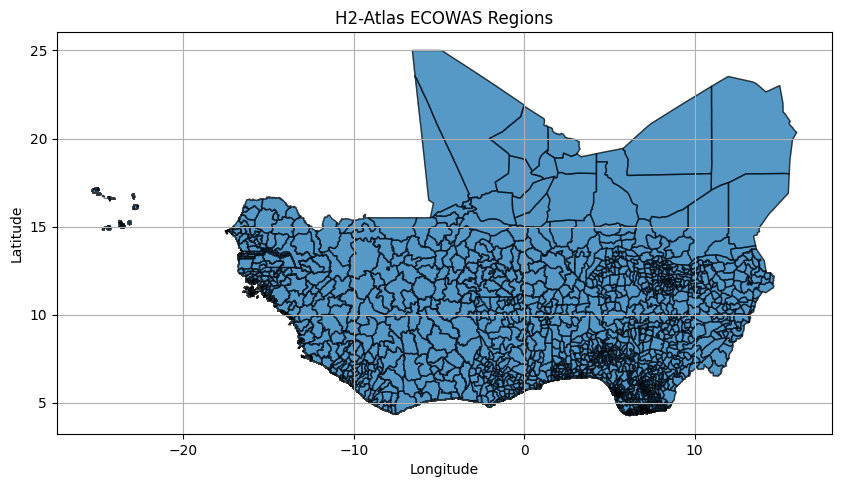

In [3]:
gdf_original = gpd.GeoDataFrame.from_features(features, crs="EPSG:4326")

ax = gdf_original.plot(figsize=(10, 10), edgecolor="black", alpha=0.5)
plt.title("H2-Atlas ECOWAS Regions")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

In [4]:
gdf_original

geometry  ogc_fid  region_id  \
0     MULTIPOLYGON (((2.84677 11.42146, 2.84839 11.4...        1  BEN.1.1_1   
1     MULTIPOLYGON (((0.89754 10.29424, 0.8838 10.30...        8  BEN.2.2_1   
2     MULTIPOLYGON (((2.26583 10.54574, 2.26583 10.5...        2  BEN.1.2_1   
3     MULTIPOLYGON (((2.20142 6.60356, 2.17778 6.606...       17  BEN.3.2_1   
4     MULTIPOLYGON (((3.27394 11.30677, 3.27216 11.2...        3  BEN.1.3_1   
...                                                 ...      ...        ...   
2851  MULTIPOLYGON (((0.89222 6.82555, 0.89222 6.819...     4366  TGO.4.3_1   
2852  MULTIPOLYGON (((1.63589 7.40091, 1.63417 7.398...     4367  TGO.4.4_1   
2853  MULTIPOLYGON (((0.79278 7.40333, 0.78972 7.401...     4368  TGO.4.5_1   
2854  MULTIPOLYGON (((0.16896 10.42381, 0.16595 10.4...     4369  TGO.5.1_1   
2855  MULTIPOLYGON (((0.02654 11.0291, 0.02634 11.03...     4370  TGO.5.2_1   

     gid_0 name_0    gid_1      name_1 nl_name_1      gid_2     name_2  ...  \
0      BEN  Benin  BEN.1_1     Alibori      None  BEN.1.1_1  Banikoara  ...   
1      BEN  Benin  BEN.2_1     Atakora      None  BEN.2.2_1      Cobly  ...   
2      BEN  Benin  BEN.1_1     Alibori      None  BEN.1.2_1   Gogounou  ...   
3      BEN  Benin  BEN.3_1  Atlantique      None  BEN.3.2_1     Allada  ...   
4      BEN  Benin  BEN.1_1     Alibori      None  BEN.1.3_1      Kandi  ...   
...    ...    ...      ...         ...       ...        ...        ...  ...   
2851   TGO   Togo  TGO.4_1    Plateaux      None  TGO.4.3_1      Kloto  ...   
2852   TGO   Togo  TGO.4_1    Plateaux      None  TGO.4.4_1       Ogou  ...   
2853   TGO   Togo  TGO.4_1    Plateaux      None  TGO.4.5_1       Wawa  ...   
2854   TGO   Togo  TGO.5_1     Savanes      None  TGO.5.1_1        Oti  ...   
2855   TGO   Togo  TGO.5_1     Savanes      None  TGO.5.2_1       Tône  ...   

     na25ltekg2 na25ltekg3 na25ltekg4 na25ltekg5 na50ltekg2 na50ltekg3  \
0          4.48       2.87       2.34       2.04       4.49       2.87   
1          4.48       2.87       2.34       2.04       4.49       2.87   
2          4.48       2.87       2.34       2.04       4.49       2.87   
3          4.48       2.87       2.34       2.04       4.49       2.87   
4          4.48       2.87       2.34       2.04       4.49       2.87   
...         ...        ...        ...        ...        ...        ...   
2851       4.71       3.01       2.44       2.12       4.72       3.01   
2852       4.71       3.01       2.44       2.12       4.72       3.01   
2853       4.71       3.01       2.44       2.12       4.72       3.01   
2854       4.71       3.01       2.44       2.12       4.72       3.01   
2855       4.71       3.01       2.44       2.12       4.72       3.01   

     na50ltekg4 na50ltekg5 na00ltekg2 na00ltekg5  
0          2.34       2.04      4.928      2.432  
1          2.34       2.04      4.928      2.432  
2          2.34       2.04      4.928      2.432  
3          2.34       2.04      4.928      2.432  
4          2.34       2.04      4.928      2.432  
...         ...        ...        ...        ...  
2851       2.45       2.13      5.105      2.320  
2852       2.45       2.13      5.105      2.320  
2853       2.45       2.13      5.105      2.320  
2854       2.45       2.13      5.105      2.320  
2855       2.45       2.13      5.105      2.320  

[2856 rows x 370 columns]

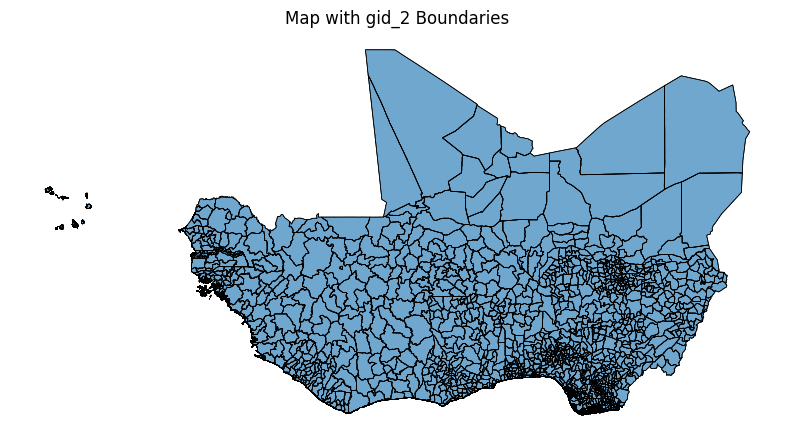

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt

gdf = gdf_original

fig, ax = plt.subplots(figsize=(10, 10))
gdf.boundary.plot(ax=ax, linewidth=0.5, color='black')  
gdf.plot(ax=ax, alpha=0.4) 

plt.title("Map with gid_2 Boundaries")
plt.axis('off')
plt.show()

C:\Users\g.adekunle\AppData\Local\miniforge3\envs\master_thesis\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


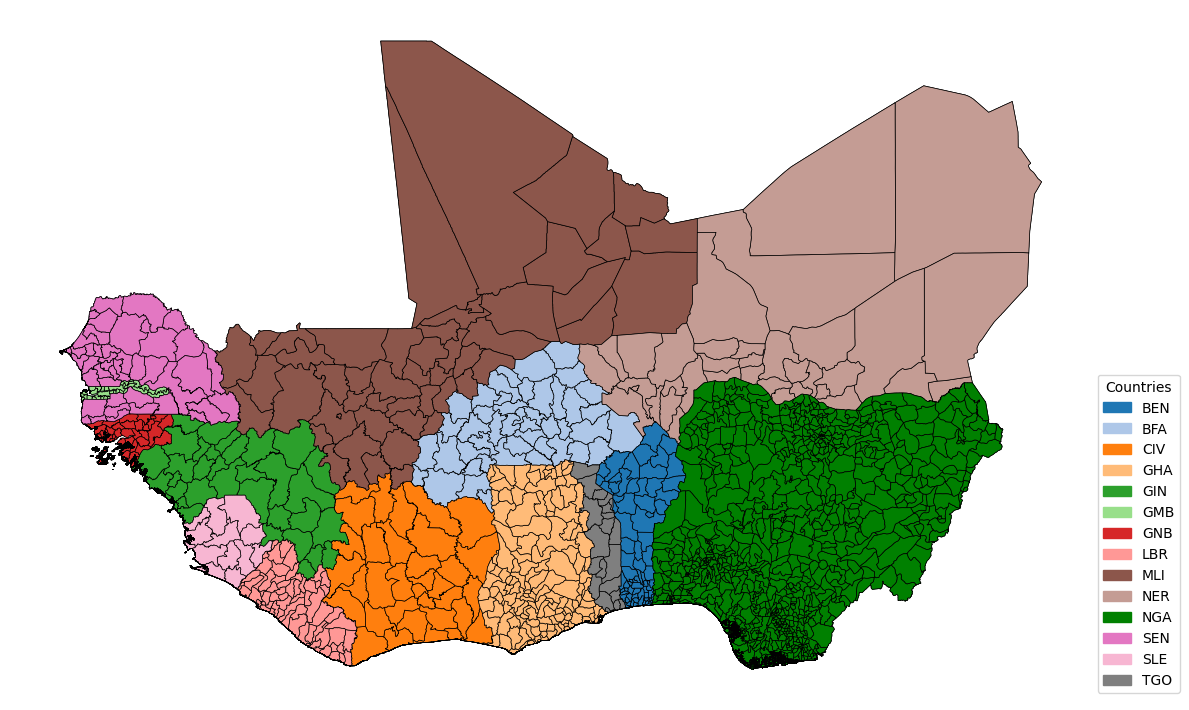

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import to_rgb
import colorsys

def is_purple(color):
    r, g, b = to_rgb(color)
    h, s, v = colorsys.rgb_to_hsv(r, g, b)
    return 0.72 <= h <= 0.85


gdf_filtered = gdf_original[gdf_original['gid_0'] != 'CPV']


unique_countries = gdf_filtered['gid_0'].unique()


cmap = plt.get_cmap('tab20')
valid_colors = [cmap(i) for i in range(cmap.N) if not is_purple(cmap(i))]
color_dict = {'NGA': 'green'}
i = 0
for country in unique_countries:
    if country == 'NGA':
        continue
    color_dict[country] = valid_colors[i % len(valid_colors)]
    i += 1
gdf_filtered['color'] = gdf_filtered['gid_0'].map(color_dict)

fig, ax = plt.subplots(figsize=(12, 12))
gdf_filtered.plot(ax=ax, color=gdf_filtered['color'], edgecolor='black', linewidth=0.5)

sorted_countries = sorted(unique_countries)
legend_patches = [mpatches.Patch(color=color_dict[c], label=c) for c in sorted_countries]
plt.legend(handles=legend_patches, title="Countries", loc='lower left', bbox_to_anchor=(1, 0), fontsize='medium')
plt.axis('off')
plt.tight_layout()
fig.savefig("country_gid2_map.jpeg", format='jpeg', dpi=300)
plt.show()

In [5]:
wa_h2_potentials_keys = []
for col in gdf_original.columns:
    if "tpgwha" in col:
        wa_h2_potentials_keys.append(col)

In [6]:
wa_h2_potentials_keys

['01tpgwha',
 '02tpgwha',
 '04tpgwha',
 '06tpgwha',
 '10tpgwha',
 '15tpgwha',
 '20tpgwha',
 '25tpgwha',
 '30tpgwha',
 '50tpgwha',
 '70tpgwha',
 '75tpgwha',
 '80tpgwha',
 '85tpgwha',
 '90tpgwha',
 '96tpgwha',
 '98tpgwha',
 '99tpgwha',
 '00tpgwha',
 'h2tpgwha']

In [7]:
gdf_original["h2gtpperc"]

0       100.0
1         NaN
2       100.0
3         NaN
4        93.4
        ...  
2851      0.9
2852     17.8
2853     14.1
2854    100.0
2855     12.4
Name: h2gtpperc, Length: 2856, dtype: float64

In [8]:
gdf_original["h2tpgwha"]

0           61.105
1            0.000
2          430.332
3            0.000
4        10339.412
           ...    
2851     66859.552
2852    161102.544
2853     32821.857
2854     54796.883
2855     61763.198
Name: h2tpgwha, Length: 2856, dtype: float64

In [9]:
scenarios = [x[:2] for x in wa_h2_potentials_keys]
scenarios

['01',
 '02',
 '04',
 '06',
 '10',
 '15',
 '20',
 '25',
 '30',
 '50',
 '70',
 '75',
 '80',
 '85',
 '90',
 '96',
 '98',
 '99',
 '00',
 'h2']

In [10]:
for s in scenarios:
    gdf_original[f"{s}h2withwater"] = gdf_original[f"h2gtpperc"] * gdf_original[f"{s}tpgwha"] / 100

In [11]:
gdf_original

geometry  ogc_fid  region_id  \
0     MULTIPOLYGON (((2.84677 11.42146, 2.84839 11.4...        1  BEN.1.1_1   
1     MULTIPOLYGON (((0.89754 10.29424, 0.8838 10.30...        8  BEN.2.2_1   
2     MULTIPOLYGON (((2.26583 10.54574, 2.26583 10.5...        2  BEN.1.2_1   
3     MULTIPOLYGON (((2.20142 6.60356, 2.17778 6.606...       17  BEN.3.2_1   
4     MULTIPOLYGON (((3.27394 11.30677, 3.27216 11.2...        3  BEN.1.3_1   
...                                                 ...      ...        ...   
2851  MULTIPOLYGON (((0.89222 6.82555, 0.89222 6.819...     4366  TGO.4.3_1   
2852  MULTIPOLYGON (((1.63589 7.40091, 1.63417 7.398...     4367  TGO.4.4_1   
2853  MULTIPOLYGON (((0.79278 7.40333, 0.78972 7.401...     4368  TGO.4.5_1   
2854  MULTIPOLYGON (((0.16896 10.42381, 0.16595 10.4...     4369  TGO.5.1_1   
2855  MULTIPOLYGON (((0.02654 11.0291, 0.02634 11.03...     4370  TGO.5.2_1   

     gid_0 name_0    gid_1      name_1 nl_name_1      gid_2     name_2  ...  \
0      BEN  Benin  BEN.1_1     Alibori      None  BEN.1.1_1  Banikoara  ...   
1      BEN  Benin  BEN.2_1     Atakora      None  BEN.2.2_1      Cobly  ...   
2      BEN  Benin  BEN.1_1     Alibori      None  BEN.1.2_1   Gogounou  ...   
3      BEN  Benin  BEN.3_1  Atlantique      None  BEN.3.2_1     Allada  ...   
4      BEN  Benin  BEN.1_1     Alibori      None  BEN.1.3_1      Kandi  ...   
...    ...    ...      ...         ...       ...        ...        ...  ...   
2851   TGO   Togo  TGO.4_1    Plateaux      None  TGO.4.3_1      Kloto  ...   
2852   TGO   Togo  TGO.4_1    Plateaux      None  TGO.4.4_1       Ogou  ...   
2853   TGO   Togo  TGO.4_1    Plateaux      None  TGO.4.5_1       Wawa  ...   
2854   TGO   Togo  TGO.5_1     Savanes      None  TGO.5.1_1        Oti  ...   
2855   TGO   Togo  TGO.5_1     Savanes      None  TGO.5.2_1       Tône  ...   

     70h2withwater 75h2withwater 80h2withwater 85h2withwater 90h2withwater  \
0        42.773500     45.828750     48.884000     51.939250     54.994500   
1              NaN           NaN           NaN           NaN           NaN   
2       301.232400    322.749000    344.265600    365.782200    387.298800   
3              NaN           NaN           NaN           NaN           NaN   
4      6759.907566   7242.758106   7725.608646   8208.459187   8691.309727   
...            ...           ...           ...           ...           ...   
2851    421.215178    451.301976    481.388774    511.475573    541.562371   
2852  20073.376982  21507.189624  22941.002266  24374.814907  25808.627549   
2853   3239.517286   3470.911378   3702.305470   3933.699561   4165.093653   
2854  38357.818100  41097.662250  43837.506400  46577.350550  49317.194700   
2855   5361.045586   5743.977414   6126.909242   6509.841069   6892.772897   

     96h2withwater 98h2withwater 99h2withwater 00h2withwater h2h2withwater  
0        58.660800     59.882900     60.493950     61.105000     61.105000  
1              NaN           NaN           NaN           NaN           NaN  
2       413.118720    421.725360    426.028680    430.332000    430.332000  
3              NaN           NaN           NaN           NaN           NaN  
4      9270.730376   9463.870592   9560.440700   9657.010808   9657.010808  
...            ...           ...           ...           ...           ...  
2851    577.666529    589.701249    595.718608    601.735968    601.735968  
2852  27529.202719  28102.727775  28389.490304  28676.252832  28676.252832  
2853   4442.766564   4535.324200   4581.603019   4627.881837   4627.881837  
2854  52605.007680  53700.945340  54248.914170  54796.883000  54796.883000  
2855   7352.291090   7505.463821   7582.050186   7658.636552   7658.636552  

[2856 rows x 390 columns]

In [12]:
gdf_original["h2h2withwater"]

0          61.105000
1                NaN
2         430.332000
3                NaN
4        9657.010808
            ...     
2851      601.735968
2852    28676.252832
2853     4627.881837
2854    54796.883000
2855     7658.636552
Name: h2h2withwater, Length: 2856, dtype: float64

(0.0, 1000000.0)

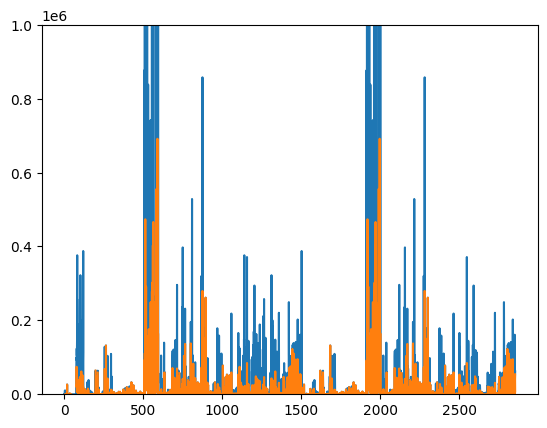

In [13]:
gdf_original["h2tpgwha"].plot()
gdf_original["h2h2withwater"].plot()
plt.ylim(0, 10e5)

In [14]:
gdf_original["h2h2withwater"].sum() / gdf_original["h2tpgwha"].sum()

0.12666604237116885

In [15]:
wa_h2_water_potentials_keys = []
for col in gdf_original.columns:
    if "h2withwater" in col:
        wa_h2_water_potentials_keys.append(col)

In [16]:
wa_h2_water_potentials_keys

['01h2withwater',
 '02h2withwater',
 '04h2withwater',
 '06h2withwater',
 '10h2withwater',
 '15h2withwater',
 '20h2withwater',
 '25h2withwater',
 '30h2withwater',
 '50h2withwater',
 '70h2withwater',
 '75h2withwater',
 '80h2withwater',
 '85h2withwater',
 '90h2withwater',
 '96h2withwater',
 '98h2withwater',
 '99h2withwater',
 '00h2withwater',
 'h2h2withwater']

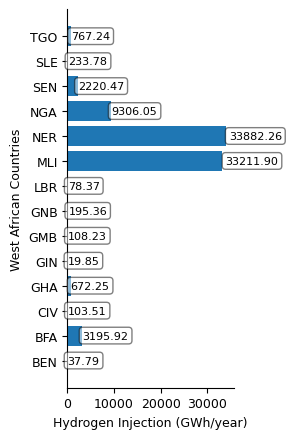

HYDROGEN INJECTION ANALYSIS - WEST AFRICAN COUNTRIES

Country-wise aggregation (original values):
BEN: 125,952.04 GWh
BFA: 10,653,054.55 GWh
CIV: 345,035.54 GWh
GHA: 2,240,849.75 GWh
GIN: 66,162.80 GWh
GMB: 360,761.46 GWh
GNB: 651,185.63 GWh
LBR: 261,223.78 GWh
MLI: 110,706,324.72 GWh
NER: 112,940,865.56 GWh
NGA: 31,020,157.63 GWh
SEN: 7,401,550.83 GWh
SLE: 779,264.31 GWh
TGO: 2,557,455.08 GWh

Total across all countries (before 0.03%): 280,109,843.68 GWh
Total across all countries (after 0.03%): 84032.953103 GWh

Country-wise values after applying 0.03%:
BEN: 37.785613 GWh
BFA: 3195.916366 GWh
CIV: 103.510661 GWh
GHA: 672.254925 GWh
GIN: 19.848841 GWh
GMB: 108.228437 GWh
GNB: 195.355688 GWh
LBR: 78.367135 GWh
MLI: 33211.897416 GWh
NER: 33882.259667 GWh
NGA: 9306.047290 GWh
SEN: 2220.465249 GWh
SLE: 233.779292 GWh
TGO: 767.236523 GWh

SUMMARY STATISTICS:
Number of countries with data: 14
Highest original value: 112,940,865.56 GWh (NER)
Lowest non-zero original value: 66,162.80 GWh
Aver

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

west_african_countries = ['BEN', 'BFA', 'CIV', 'GHA', 'GIN', 'GMB', 'GNB', 'LBR', 'MLI', 'NER', 'NGA', 'SEN', 'SLE', 'TGO']
country_column = 'gid_0' 
filtered_data = gdf_original[
    (gdf_original[country_column].isin(west_african_countries)) & 
    (gdf_original['h2tpgwha'].notna())
]
country_aggregation = filtered_data.groupby(country_column)['h2tpgwha'].sum()

country_totals = pd.Series(0.0, index=west_african_countries)
country_totals.update(country_aggregation)

total_before = country_totals.sum()

country_totals_003_percent = country_totals * 0.0003  
total_after = country_totals_003_percent.sum()
plt.figure(figsize=(3, 4.5))
bars = plt.barh(country_totals_003_percent.index, country_totals_003_percent.values)
plt.xlabel('Hydrogen Injection (GWh/year)', fontsize=9, fontweight='normal')
plt.ylabel('West African Countries', fontsize=9, fontweight='normal')
plt.tick_params(axis='y', labelsize=9)  
plt.tick_params(axis='x', labelsize=9)  

for bar in bars:
    width = bar.get_width()
    plt.text(width + width*0.02, bar.get_y() + bar.get_height()/2.,
             f'{width:.2f}', ha='left', va='center', fontsize=8, 
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.5))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig('west_african_hydrogen_injection scenario 2.jpg', format='jpeg', dpi=300, bbox_inches='tight')
plt.show()
print("="*60)
print("HYDROGEN INJECTION ANALYSIS - WEST AFRICAN COUNTRIES")
print("="*60)
print(f"\nCountry-wise aggregation (original values):")
for country, value in country_totals.items():
    print(f"{country}: {value:,.2f} GWh")

print(f"\nTotal across all countries (before 0.03%): {total_before:,.2f} GWh")
print(f"Total across all countries (after 0.03%): {total_after:.6f} GWh")

print(f"\nCountry-wise values after applying 0.03%:")
for country, value in country_totals_003_percent.items():
    print(f"{country}: {value:.6f} GWh")
print(f"\nSUMMARY STATISTICS:")
print(f"Number of countries with data: {(country_totals > 0).sum()}")
print(f"Highest original value: {country_totals.max():,.2f} GWh ({country_totals.idxmax()})")
print(f"Lowest non-zero original value: {country_totals[country_totals > 0].min():,.2f} GWh")
print(f"Average per country (original): {country_totals.mean():,.2f} GWh")
print(f"Average per country (after 0.03%): {country_totals_003_percent.mean():.6f} GWh")

In [18]:
numeric_cols = gdf_original.select_dtypes(include="number").columns.difference(['ogc_fid', 'indices'])

CIV_region_name                                           geometry  \
0          CIV_CZ  POLYGON ((-4.89305 7.56258, -4.8946 7.56005, -...   
1          CIV_NZ  POLYGON ((-7.12298 9.03037, -7.1264 9.02526, -...   
2          CIV_SZ  MULTIPOLYGON (((-6.66875 4.72653, -6.66903 4.7...   

   00gwkm32  00gwkm33  00gwkm34  00gwkm35  00h2withwater  00lhekg20  \
0        20        20        20        20   60147.818720      52.40   
1        20        20        20        20   75096.935290      71.88   
2         2         2         2         2   18208.355182     148.40   

   00lhekg30  00lhekg40  ...  na25ltekg3  na25ltekg4  na25ltekg5  na50ltekg2  \
0      33.34      27.18  ...       29.80       24.20       21.20       46.60   
1      45.78      37.30  ...       41.72       33.88       29.68       65.24   
2     105.44      91.34  ...      125.16      101.64       89.04      195.72   

   na50ltekg3  na50ltekg4  na50ltekg5  nagtpperc  nasptwha  natptwha  
0        30.0       24.40       21.30      445.0   767.120  1725.180  
1        42.0       34.16       29.82      623.0  1073.968  2415.252  
2       126.0      102.48       89.46     1869.0  3221.904  7245.756  

[3 rows x 368 columns]

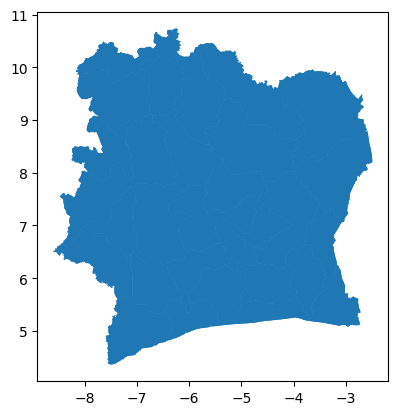

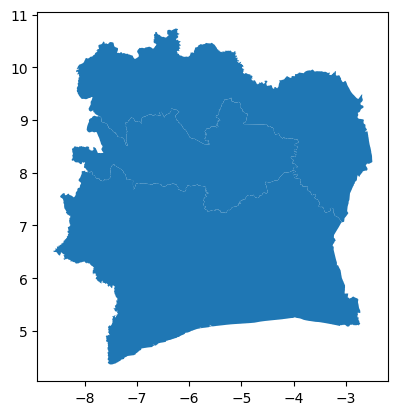

In [19]:
gdf_original[[True if x.startswith("CIV") else False for x in gdf_original.gid_1]].plot()
gdf_original[[True if x.startswith("CIV") else False for x in gdf_original.gid_1]].name_1.unique()

geo_zones = {
    "CIV_NZ": ["Savanes", "Denguélé", "Zanzan"],
    "CIV_CZ": ["Woroba", "Vallée du Bandama"],
    "CIV_SZ": ["Montagnes", "Sassandra-Marahoué", "Bas-Sassandra", "Gôh-Djiboua", "Yamoussoukro", "Lagunes", "Comoé", "Lacs", "Abidjan"]
}

gdf_original["CIV_region_name"] = None

for CIV_region_name, subregions in geo_zones.items():
    for idx, row in gdf_original.iterrows():
        if row.loc["name_1"] in subregions:
            gdf_original.at[idx, "CIV_region_name"] = CIV_region_name
grouped_data_test = gdf_original[gdf_original["gid_0"]=="CIV"].groupby("CIV_region_name")[numeric_cols].sum().reset_index()
dissolved_test = gdf_original[gdf_original["gid_0"]=="CIV"].dissolve(by="CIV_region_name", as_index=False)[["CIV_region_name", "geometry"]]
CIV_merged_gdf_test = dissolved_test.merge(grouped_data_test, on="CIV_region_name")

CIV_merged_gdf_test.plot()

CIV_merged_gdf_test

In [20]:
CIV_merged_gdf_test["h2h2withwater"]

0    60147.818720
1    75096.935290
2    18208.355182
Name: h2h2withwater, dtype: float64

In [21]:
CIV_merged_gdf_test["h2gtpperc"]

0     614.0
1    1020.6
2    2613.8
Name: h2gtpperc, dtype: float64

In [22]:
CIV_merged_gdf_test["h2tpgwha"]

0    123232.098
1    173172.688
2     48630.750
Name: h2tpgwha, dtype: float64

nga_region_name                                           geometry  \
0   North Central  POLYGON ((5.51688 8.07148, 5.51387 8.07084, 5....   
1      North East  POLYGON ((10.14893 7.03428, 10.14689 7.03187, ...   
2      North West  POLYGON ((4.65131 10.58562, 4.66442 10.59904, ...   
3      South East  POLYGON ((6.79456 5.21832, 6.7818 5.22892, 6.7...   
4     South South  MULTIPOLYGON (((5.60375 4.73681, 5.60347 4.736...   
5      South West  MULTIPOLYGON (((3.04875 6.39931, 3.04458 6.399...   

   00gwkm32  00gwkm33  00gwkm34  00gwkm35  00h2withwater  00lhekg20  \
0       640       640       640       640   2.146518e+06    1240.48   
1      1074      1074      1074      1074   3.616576e+06    1071.94   
2       192       192       192       192   6.629536e+05    1756.36   
3        76        76        76        76   3.133046e+05    1060.16   
4       204       204       204       204   7.360221e+05    1442.28   
5        82        82        82        82   2.824578e+05    1401.98   

   00lhekg30  00lhekg40  ...  na25ltekg3  na25ltekg4  na25ltekg5  na50ltekg2  \
0     797.36     652.52  ...      694.54      563.86      491.26      1089.0   
1     709.80     588.72  ...      648.62      526.58      458.78      1017.0   
2    1174.62     979.68  ...     1067.64      866.76      755.16      1674.0   
3     673.14     547.38  ...      545.30      442.70      385.70       855.0   
4     921.02     751.32  ...      706.02      573.18      499.38      1107.0   
5     890.04     723.22  ...      786.38      638.42      556.22      1233.0   

   na50ltekg3  na50ltekg4  na50ltekg5  nagtpperc     nasptwha     natptwha  
0      696.96      566.28      493.68     6050.0   938594.822  3753439.118  
1      650.88      528.84      461.04     5650.0   876538.966  3505277.854  
2     1071.36      870.48      758.88     9300.0  1442798.652  5769749.388  
3      547.20      444.60      387.60     4750.0   736913.290  2946915.010  
4      708.48      575.64      501.84     6150.0   954108.786  3815479.434  
5      789.12      641.16      558.96     6850.0  1062706.534  4249761.646  

[6 rows x 368 columns]

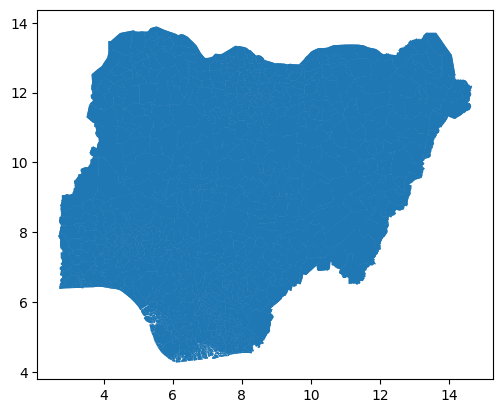

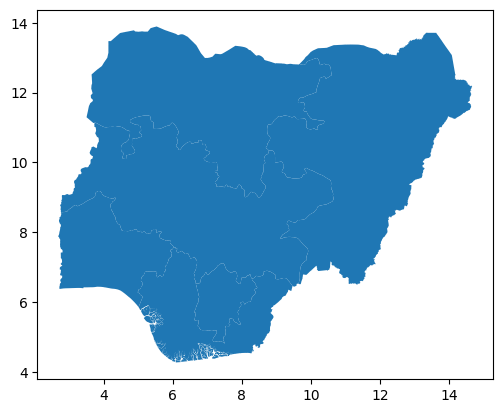

In [23]:
gdf_original[[True if x.startswith("NGA") else False for x in gdf_original.gid_1]].plot()
gdf_original[[True if x.startswith("NGA") else False for x in gdf_original.gid_1]].name_1.unique()


nga_geo_zones = {
    "North Central": ["Benue", "Kogi", "Kwara", "Nassarawa", "Niger", "Plateau", "Federal Capital Territory"],
    "North East": ["Adamawa", "Bauchi", "Borno", "Gombe", "Taraba", "Yobe"],
    "North West": ["Jigawa", "Kaduna", "Kano", "Katsina", "Kebbi", "Sokoto", "Zamfara"],
    "South East": ["Abia", "Anambra", "Ebonyi", "Enugu", "Imo"],
    "South South": ["Akwa Ibom", "Bayelsa", "Cross River", "Delta", "Edo", "Rivers"],
    "South West": ["Ekiti", "Lagos", "Ogun", "Ondo", "Osun", "Oyo"]
}

gdf_original["nga_region_name"] = None


for nga_region_name, nga_subregions in nga_geo_zones.items():
    for idx, row in gdf_original.iterrows():
        if row.loc["name_1"] in nga_subregions:
            gdf_original.at[idx, "nga_region_name"] = nga_region_name
nga_grouped_data_test = gdf_original[gdf_original["gid_0"]=="NGA"].groupby("nga_region_name")[numeric_cols].sum().reset_index()
nga_dissolved_test = gdf_original[gdf_original["gid_0"]=="NGA"].dissolve(by="nga_region_name", as_index=False)[["nga_region_name", "geometry"]]


nga_merged_gdf_test = nga_dissolved_test.merge(nga_grouped_data_test, on="nga_region_name")
nga_merged_gdf_test.plot()
nga_merged_gdf_test

BEN_region_name                                           geometry  \
0          BEN_CZ  POLYGON ((2.33389 6.93028, 2.31639 6.92944, 2....   
1          BEN_NZ  POLYGON ((1.3648 9.48525, 1.36239 9.48598, 1.3...   
2          BEN_SZ  MULTIPOLYGON (((1.86069 6.28958, 1.86069 6.289...   

   00gwkm32  00gwkm33  00gwkm34  00gwkm35  00h2withwater  00lhekg20  \
0         2         2         2         2    7784.710000      56.22   
1        26        26        26        26   98534.019328     194.16   
2         0         0         0         0       0.000000       0.00   

   00lhekg30  00lhekg40  ...  na25ltekg3  na25ltekg4  na25ltekg5  na50ltekg2  \
0      40.48      35.12  ...       86.10       70.20       61.20      134.70   
1     134.32     113.86  ...      154.98      126.36      110.16      242.46   
2       0.00       0.00  ...      195.16      159.12      138.72      305.32   

   na50ltekg3  na50ltekg4  na50ltekg5  nagtpperc  nasptwha  natptwha  
0       86.10       70.20       61.20     2532.0  1594.710  1889.280  
1      154.98      126.36      110.16     4557.6  2870.478  3400.704  
2      195.16      159.12      138.72     5739.2  3614.676  4282.368  

[3 rows x 368 columns]

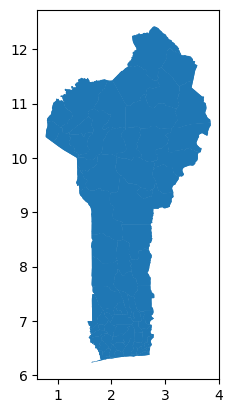

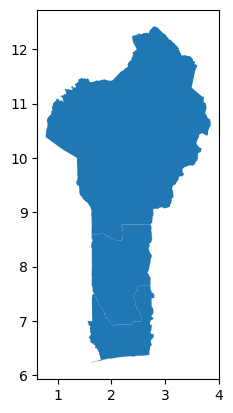

In [24]:
gdf_original[[True if x.startswith("BEN") else False for x in gdf_original.gid_1]].plot()
gdf_original[[True if x.startswith("BEN") else False for x in gdf_original.gid_1]].name_1.unique()

BEN_geo_zones = {
    "BEN_NZ": ["Atakora", "Donga", "Alibori", "Borgou"],
    "BEN_CZ": ["Collines", "Zou"],
    "BEN_SZ": ["Littoral", "Atlantique", "Ouémé", "Mono", "Kouffo", "Plateau"]
}

gdf_original["BEN_region_name"] = None


for BEN_region_name, BEN_subregions in BEN_geo_zones.items():
    for idx, row in gdf_original.iterrows():
        if row.loc["name_1"] in BEN_subregions:
            gdf_original.at[idx, "BEN_region_name"] = BEN_region_name


BEN_grouped_data_test = gdf_original[gdf_original["gid_0"]=="BEN"].groupby("BEN_region_name")[numeric_cols].sum().reset_index()
BEN_dissolved_test = gdf_original[gdf_original["gid_0"]=="BEN"].dissolve(by="BEN_region_name", as_index=False)[["BEN_region_name", "geometry"]]

BEN_merged_gdf_test = BEN_dissolved_test.merge(BEN_grouped_data_test, on="BEN_region_name")
BEN_merged_gdf_test.plot()
BEN_merged_gdf_test

TGO_region_name                                           geometry  \
0          TGO_NZ  POLYGON ((1.23667 8.36084, 1.23333 8.35695, 1....   
1          TGO_SZ  MULTIPOLYGON (((1.39292 6.18014, 1.39236 6.180...   

   00gwkm32  00gwkm33  00gwkm34  00gwkm35  00h2withwater  00lhekg20  \
0       170       170       170       170  569984.984100     109.88   
1        24        24        24        24   81039.245762     104.08   

   00lhekg30  00lhekg40  ...  na25ltekg3  na25ltekg4  na25ltekg5  na50ltekg2  \
0      70.18      57.28  ...       66.22       53.68       46.64      103.84   
1      66.28      54.00  ...       60.20       48.80       42.40       94.40   

   na50ltekg3  na50ltekg4  na50ltekg5  nagtpperc  nasptwha   natptwha  
0       66.22        53.9       46.86      561.0  7161.484  28132.016  
1       60.20        49.0       42.60      510.0  6510.440  25574.560  

[2 rows x 368 columns]

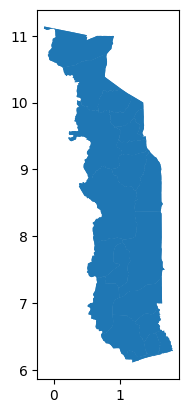

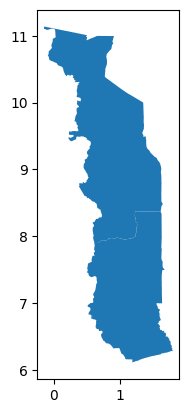

In [25]:
gdf_original[[True if x.startswith("TGO") else False for x in gdf_original.gid_1]].plot()
gdf_original[[True if x.startswith("TGO") else False for x in gdf_original.gid_1]].name_1.unique()

TGO_geo_zones = {
    "TGO_NZ": ["Centre", "Kara", "Savanes"],
    "TGO_SZ": ["Maritime", "Plateaux"]
}

gdf_original["TGO_region_name"] = None


for TGO_region_name, TGO_subregions in TGO_geo_zones.items():
    for idx, row in gdf_original.iterrows():
        if row.loc["name_1"] in TGO_subregions:
            gdf_original.at[idx, "TGO_region_name"] = TGO_region_name


TGO_grouped_data_test = gdf_original[gdf_original["gid_0"]=="TGO"].groupby("TGO_region_name")[numeric_cols].sum().reset_index()
TGO_dissolved_test = gdf_original[gdf_original["gid_0"]=="TGO"].dissolve(by="TGO_region_name", as_index=False)[["TGO_region_name", "geometry"]]
TGO_merged_gdf_test = TGO_dissolved_test.merge(TGO_grouped_data_test, on="TGO_region_name")
TGO_merged_gdf_test.plot()
TGO_merged_gdf_test

bfa_region_name                                           geometry  \
0         BFA_NEZ  POLYGON ((-2.48154 12.61973, -2.48148 12.62506...   
1         BFA_SCZ  POLYGON ((-4.17318 9.78263, -4.17767 9.7781, -...   

   00gwkm32  00gwkm33  00gwkm34  00gwkm35  00h2withwater  00lhekg20  \
0       256       256       256       256  853451.129546     149.94   
1       228       228       228       228  745975.624498     274.92   

   00lhekg30  00lhekg40  ...  na25ltekg3  na25ltekg4  na25ltekg5  na50ltekg2  \
0      99.02      82.04  ...       90.56        73.6        64.0       142.4   
1     176.62     144.42  ...      164.14       133.4       116.0       258.1   

   na50ltekg3  na50ltekg4  na50ltekg5  nagtpperc   nasptwha    natptwha  
0       90.88        73.6        64.0      480.0  25591.392  170448.864  
1      164.72       133.4       116.0      870.0  46384.398  308938.566  

[2 rows x 368 columns]

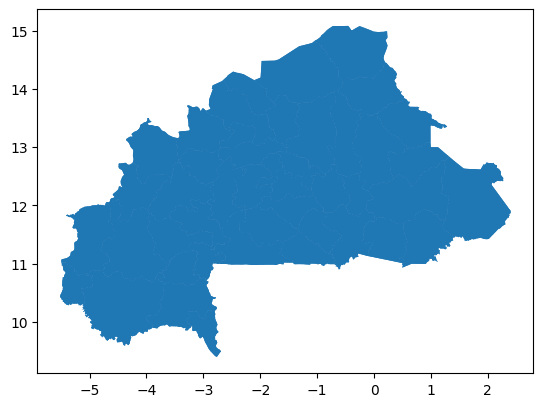

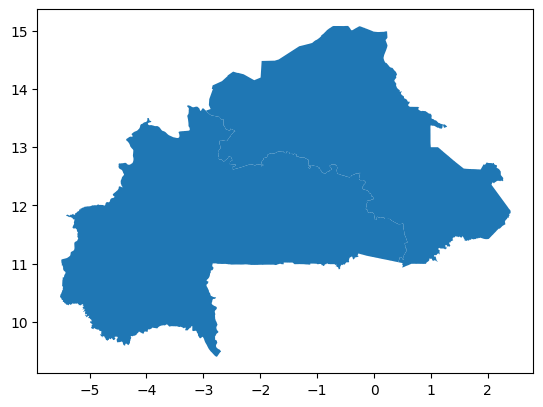

In [26]:
gdf_original[[True if x.startswith("BFA") else False for x in gdf_original.gid_1]].plot()
gdf_original[[True if x.startswith("BFA") else False for x in gdf_original.gid_1]].name_1.unique()

bfa_geo_zones = {
    "BFA_NEZ": ["Sahel", "Nord", "Est", "Centre-Nord"],
    "BFA_SCZ": ["Centre", "Centre-Sud", "Centre-Est", "Centre-Ouest", "Plateau-Central", "Boucle du Mouhoun", "Cascades", "Haut-Bassins", "Sud-Ouest"]
}

gdf_original["bfa_region_name"] = None


for bfa_region_name, bfa_subregions in bfa_geo_zones.items():
    for idx, row in gdf_original.iterrows():
        if row.loc["name_1"] in bfa_subregions:
            gdf_original.at[idx, "bfa_region_name"] = bfa_region_name


bfa_grouped_data_test = gdf_original[gdf_original["gid_0"]=="BFA"].groupby("bfa_region_name")[numeric_cols].sum().reset_index()
bfa_dissolved_test = gdf_original[gdf_original["gid_0"]=="BFA"].dissolve(by="bfa_region_name", as_index=False)[["bfa_region_name", "geometry"]]

bfa_merged_gdf_test = bfa_dissolved_test.merge(bfa_grouped_data_test, on="bfa_region_name")
bfa_merged_gdf_test.plot()
bfa_merged_gdf_test

gha_region_name                                           geometry  \
0          GHA_MZ  POLYGON ((-2.14867 6.35273, -2.15862 6.35324, ...   
1          GHA_NZ  POLYGON ((-1.95843 8.16998, -1.97106 8.1635, -...   
2          GHA_SZ  MULTIPOLYGON (((-2.03625 4.75375, -2.03542 4.7...   

   00gwkm32  00gwkm33  00gwkm34  00gwkm35  00h2withwater  00lhekg20  \
0       148       148       146       148   502706.12830     439.12   
1       260       260       260       260   871064.20061     352.08   
2        10        10        10        10    42133.38325     397.76   

   00lhekg30  00lhekg40  ...  na25ltekg3  na25ltekg4  na25ltekg5  na50ltekg2  \
0     287.32     237.24  ...      331.52       268.8      234.08       520.8   
1     239.40     201.28  ...      201.28       163.2      142.12       316.2   
2     268.70     225.78  ...      278.24       225.6      196.46       437.1   

   na50ltekg3  na50ltekg4  na50ltekg5  nagtpperc  nasptwha   natptwha  
0      332.64      269.92       235.2     7078.4  79288.72  125487.60  
1      201.96      163.88       142.8     4297.6  48139.58   76188.90  
2      279.18      226.54       197.4     5940.8  66545.89  105319.95  

[3 rows x 368 columns]

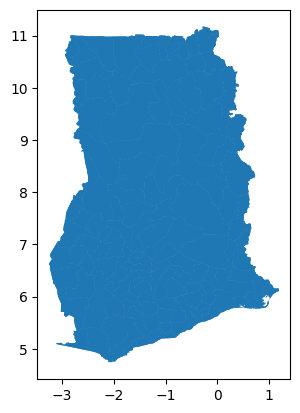

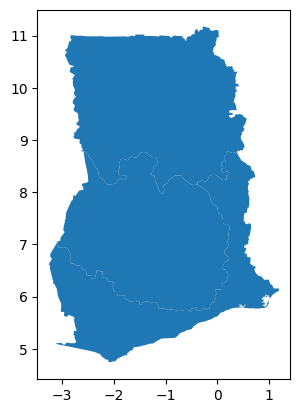

In [27]:
gdf_original[[True if x.startswith("GHA") else False for x in gdf_original.gid_1]].plot()
gdf_original[[True if x.startswith("GHA") else False for x in gdf_original.gid_1]].name_1.unique()


gha_geo_zones = {
    "GHA_NZ": ["Northern", "Upper East", "Upper West"],
    "GHA_MZ": ["Brong Ahafo", "Ashanti", "Eastern"],
    "GHA_SZ": ["Greater Accra", "Central", "Western", "Volta"]
}

gdf_original["gha_region_name"] = None


for gha_region_name, gha_subregions in gha_geo_zones.items():
    for idx, row in gdf_original.iterrows():
        if row.loc["name_1"] in gha_subregions:
            gdf_original.at[idx, "gha_region_name"] = gha_region_name


gha_grouped_data_test = gdf_original[gdf_original["gid_0"]=="GHA"].groupby("gha_region_name")[numeric_cols].sum().reset_index()
gha_dissolved_test = gdf_original[gdf_original["gid_0"]=="GHA"].dissolve(by="gha_region_name", as_index=False)[["gha_region_name", "geometry"]]

gha_merged_gdf_test = gha_dissolved_test.merge(gha_grouped_data_test, on="gha_region_name")
gha_merged_gdf_test.plot()
gha_merged_gdf_test

lbr_region_name                                           geometry  \
0          LBR_CZ  MULTIPOLYGON (((-10.20875 6.01292, -10.20875 6...   
1          LBR_NZ  POLYGON ((-11.15431 6.61903, -11.15431 6.61931...   
2          LBR_SZ  POLYGON ((-8.37569 4.64681, -8.37569 4.64708, ...   

   00gwkm32  00gwkm33  00gwkm34  00gwkm35  00h2withwater  00lhekg20  \
0        38        38        38        38     148158.030     343.58   
1        28        28        28        28      80551.462     193.68   
2         6         6         6         6      32514.290     197.10   

   00lhekg30  00lhekg40  ...  na25ltekg3  na25ltekg4  na25ltekg5  na50ltekg2  \
0     218.06     177.20  ...      189.60      154.20      134.40       297.0   
1     123.10     100.10  ...      113.76       92.52       80.64       178.2   
2     125.56     102.34  ...      113.76       92.52       80.64       178.2   

   na50ltekg3  na50ltekg4  na50ltekg5  nagtpperc  nasptwha  natptwha  
0      190.80      154.80       135.0     6000.0  7836.720  7836.720  
1      114.48       92.88        81.0     3600.0  4702.032  4702.032  
2      114.48       92.88        81.0     3600.0  4702.032  4702.032  

[3 rows x 368 columns]

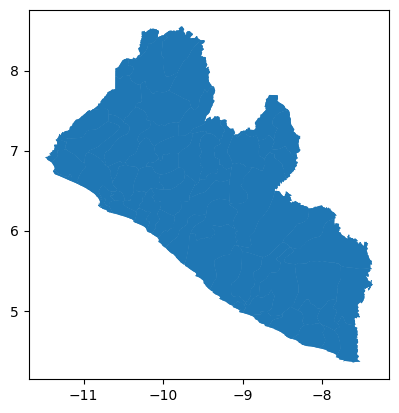

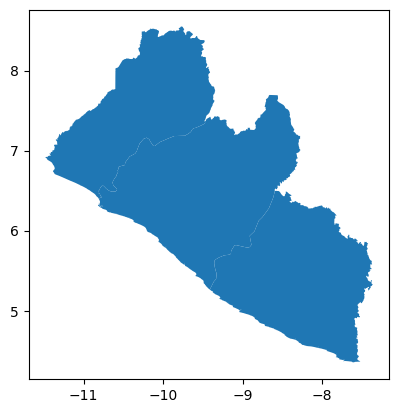

In [28]:
gdf_original[[True if x.startswith("LBR") else False for x in gdf_original.gid_1]].plot()
gdf_original[[True if x.startswith("LBR") else False for x in gdf_original.gid_1]].name_1.unique()

lbr_geo_zones = {
    "LBR_NZ": ["Lofa", "Bomi", "Grand Cape Mount", "Gbapolu"],
    "LBR_CZ": ["Margibi", "Bong", "GrandBassa", "River Cess", "Nimba", "Montserrado"],
    "LBR_SZ": ["GrandGedeh", "River Gee", "Sinoe", "Maryland", "GrandKru"]
}

gdf_original["lbr_region_name"] = None


for lbr_region_name, lbr_subregions in lbr_geo_zones.items():
    for idx, row in gdf_original.iterrows():
        if row.loc["name_1"] in lbr_subregions:
            gdf_original.at[idx, "lbr_region_name"] = lbr_region_name


lbr_grouped_data_test = gdf_original[gdf_original["gid_0"]=="LBR"].groupby("lbr_region_name")[numeric_cols].sum().reset_index()
lbr_dissolved_test = gdf_original[gdf_original["gid_0"]=="LBR"].dissolve(by="lbr_region_name", as_index=False)[["lbr_region_name", "geometry"]]

lbr_merged_gdf_test = lbr_dissolved_test.merge(lbr_grouped_data_test, on="lbr_region_name")
lbr_merged_gdf_test.plot()
lbr_merged_gdf_test

gin_region_name                                           geometry  \
0          GIN_IG  POLYGON ((-11.89825 9.94571, -11.90165 9.94166...   
1          GIN_LG  MULTIPOLYGON (((-14.95125 10.84236, -14.94847 ...   

   00gwkm32  00gwkm33  00gwkm34  00gwkm35  00h2withwater  00lhekg20  \
0        10        10        10        10      43860.068     165.56   
1         6         6         6         6      22302.734      92.94   

   00lhekg30  00lhekg40  ...  na25ltekg3  na25ltekg4  na25ltekg5  na50ltekg2  \
0     120.40     105.34  ...      116.84        98.9       88.78      174.34   
1      68.48      60.08  ...       55.88        47.3       42.46       83.38   

   na50ltekg3  na50ltekg4  na50ltekg5  nagtpperc  nasptwha  natptwha  
0      118.22       99.36       89.24     4600.0  1521.726  1521.726  
1       56.54       47.52       42.68     2200.0   727.782   727.782  

[2 rows x 368 columns]

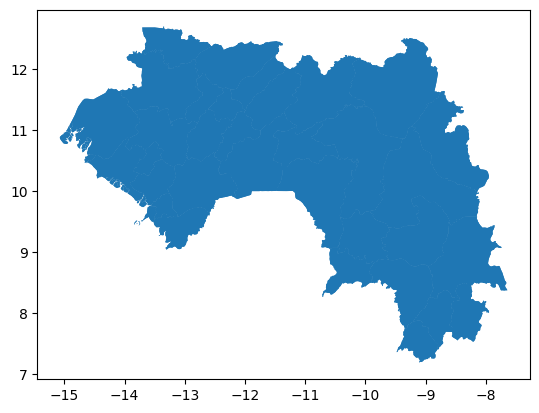

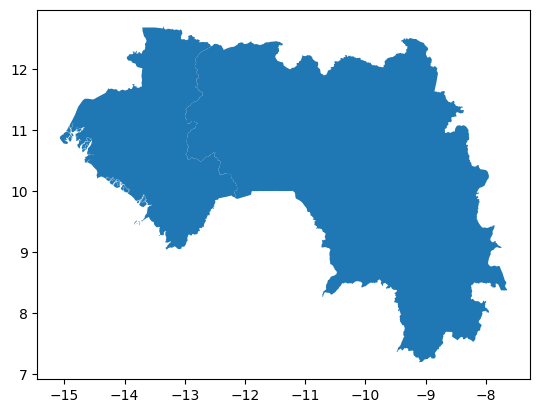

In [29]:
gdf_original[[True if x.startswith("GIN") else False for x in gdf_original.gid_1]].plot()
gdf_original[[True if x.startswith("GIN") else False for x in gdf_original.gid_1]].name_1.unique()

gin_geo_zones = {
    "GIN_LG": ["Conakry", "Boké", "Kindia"],
    "GIN_IG": ["Faranah", "Kankan", "Labé", "Mamou", "Nzérékoré"]
}

gdf_original["gin_region_name"] = None


for gin_region_name, gin_subregions in gin_geo_zones.items():
    for idx, row in gdf_original.iterrows():
        if row.loc["name_1"] in gin_subregions:
            gdf_original.at[idx, "gin_region_name"] = gin_region_name


gin_grouped_data_test = gdf_original[gdf_original["gid_0"]=="GIN"].groupby("gin_region_name")[numeric_cols].sum().reset_index()
gin_dissolved_test = gdf_original[gdf_original["gid_0"]=="GIN"].dissolve(by="gin_region_name", as_index=False)[["gin_region_name", "geometry"]]

gin_merged_gdf_test = gin_dissolved_test.merge(gin_grouped_data_test, on="gin_region_name")
gin_merged_gdf_test.plot()
gin_merged_gdf_test

gnb_region_name                                           geometry  \
0         GNB_NER  MULTIPOLYGON (((-16.08403 11.75736, -16.08542 ...   
1         GNB_SCR  MULTIPOLYGON (((-16.13931 11.02542, -16.13931 ...   

   00gwkm32  00gwkm33  00gwkm34  00gwkm35  00h2withwater  00lhekg20  \
0       170       170       170       170  572425.431678     215.72   
1        16        16        16        16   58723.536000     119.32   

   00lhekg30  00lhekg40  ...  na25ltekg3  na25ltekg4  na25ltekg5  na50ltekg2  \
0     137.10     111.38  ...      128.04      103.84        90.2      200.64   
1      75.84      61.64  ...       87.30       70.80        61.5      136.80   

   na50ltekg3  na50ltekg4  na50ltekg5  nagtpperc   nasptwha   natptwha  
0      128.04      103.84        90.2     4263.6  13885.168  14326.092  
1       87.30       70.80        61.5     2907.0   9467.160   9767.790  

[2 rows x 368 columns]

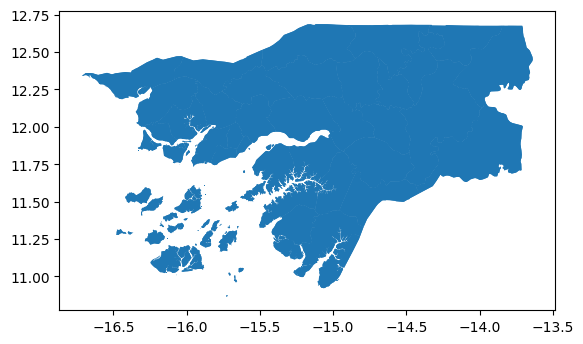

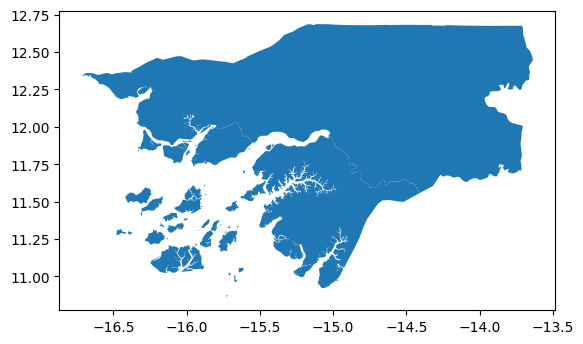

In [30]:
gdf_original[[True if x.startswith("GNB") else False for x in gdf_original.gid_1]].plot()
gdf_original[[True if x.startswith("GNB") else False for x in gdf_original.gid_1]].name_1.unique()

gnb_geo_zones = {
    "GNB_NER": ["Cacheu", "Oio", "Bafatá", "Gabú"],
    "GNB_SCR": ["Biombo", "Quinara", "Tombali", "Bolama", "Bissau"]
}

gdf_original["gnb_region_name"] = None


for gnb_region_name, gnb_subregions in gnb_geo_zones.items():
    for idx, row in gdf_original.iterrows():
        if row.loc["name_1"] in gnb_subregions:
            gdf_original.at[idx, "gnb_region_name"] = gnb_region_name


gnb_grouped_data_test = gdf_original[gdf_original["gid_0"]=="GNB"].groupby("gnb_region_name")[numeric_cols].sum().reset_index()
gnb_dissolved_test = gdf_original[gdf_original["gid_0"]=="GNB"].dissolve(by="gnb_region_name", as_index=False)[["gnb_region_name", "geometry"]]

gnb_merged_gdf_test = gnb_dissolved_test.merge(gnb_grouped_data_test, on="gnb_region_name")
gnb_merged_gdf_test.plot()
gnb_merged_gdf_test

sen_region_name                                           geometry  \
0          SEN_NR  MULTIPOLYGON (((-16.65347 13.64736, -16.65347 ...   
1          SEN_SR  MULTIPOLYGON (((-16.50829 12.35051, -16.50995 ...   

   00gwkm32  00gwkm33  00gwkm34  00gwkm35  00h2withwater  00lhekg20  \
0       302       302       302       302   1.021950e+06     240.40   
1       684       684       684       684   2.287482e+06     153.18   

   00lhekg30  00lhekg40  ...  na25ltekg3  na25ltekg4  na25ltekg5  na50ltekg2  \
0     168.04     142.92  ...       162.4      131.66      114.26      249.98   
1      98.78      80.88  ...        89.6       72.64       63.04      137.92   

   na50ltekg3  na50ltekg4  na50ltekg5  nagtpperc  nasptwha   natptwha  
0      162.98      132.24      114.84     2592.6  95955.78  214644.95  
1       89.92       72.96       63.36     1430.4  52941.12  118424.80  

[2 rows x 368 columns]

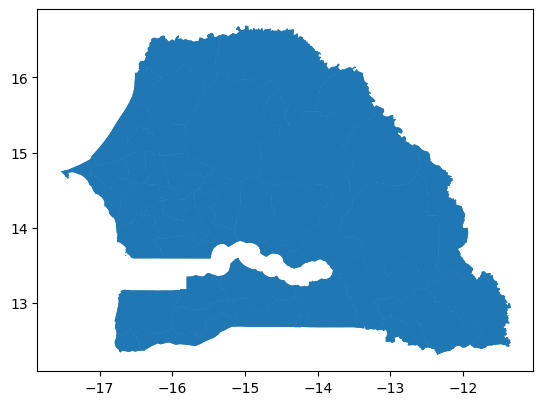

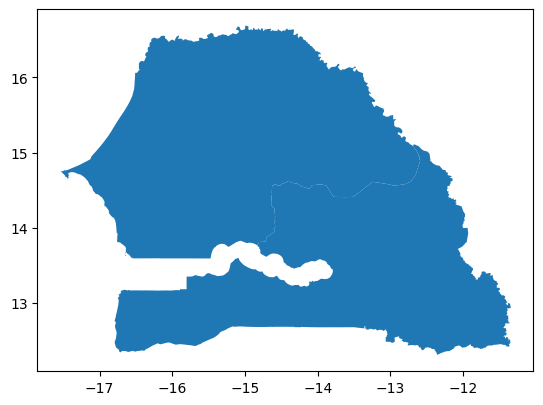

In [31]:
gdf_original[[True if x.startswith("SEN") else False for x in gdf_original.gid_1]].plot()
gdf_original[[True if x.startswith("SEN") else False for x in gdf_original.gid_1]].name_1.unique()


sen_geo_zones = {
    "SEN_NR": ["Saint-Louis", "Matam", "Louga", "Kaolack", "Fatick",  "Dakar", "Thiès", "Diourbel", "Kaffrine"],
    "SEN_SR": ["Kolda", "Tambacounda", "Ziguinchor", "Sédhiou", "Kédougou"]
}

gdf_original["sen_region_name"] = None


for sen_region_name, sen_subregions in sen_geo_zones.items():
    for idx, row in gdf_original.iterrows():
        if row.loc["name_1"] in sen_subregions:
            gdf_original.at[idx, "sen_region_name"] = sen_region_name


sen_grouped_data_test = gdf_original[gdf_original["gid_0"]=="SEN"].groupby("sen_region_name")[numeric_cols].sum().reset_index()
sen_dissolved_test = gdf_original[gdf_original["gid_0"]=="SEN"].dissolve(by="sen_region_name", as_index=False)[["sen_region_name", "geometry"]]

sen_merged_gdf_test = sen_dissolved_test.merge(sen_grouped_data_test, on="sen_region_name")
sen_merged_gdf_test.plot()
sen_merged_gdf_test

gmb_region_name                                           geometry  \
0          GMB_AR  MULTIPOLYGON (((-16.6905 13.16431, -16.69035 1...   

   00gwkm32  00gwkm33  00gwkm34  00gwkm35  00h2withwater  00lhekg20  \
0        86        86        86        86  269432.270064     341.86   

   00lhekg30  00lhekg40  ...  na25ltekg3  na25ltekg4  na25ltekg5  na50ltekg2  \
0     220.98     181.16  ...      210.16       170.2       148.0       329.3   

   na50ltekg3  na50ltekg4  na50ltekg5  nagtpperc  nasptwha   natptwha  
0      210.16       170.2      148.74     5527.8  9969.724  13348.194  

[1 rows x 368 columns]

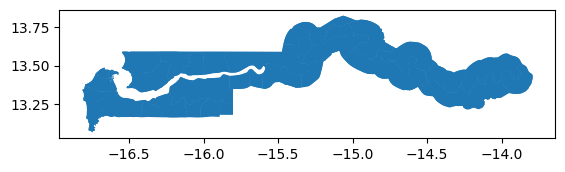

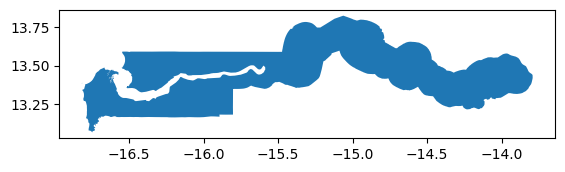

In [32]:
gdf_original[[True if x.startswith("GMB") else False for x in gdf_original.gid_1]].plot()
gdf_original[[True if x.startswith("GMB") else False for x in gdf_original.gid_1]].name_1.unique()


gmb_geo_zones = {
    "GMB_AR": ["Banjul", "Lower River", "Maccarthy Island", "Upper River", "North Bank",  "Western"]
}

gdf_original["gmb_region_name"] = None


for gmb_region_name, gmb_subregions in gmb_geo_zones.items():
    for idx, row in gdf_original.iterrows():
        if row.loc["name_1"] in gmb_subregions:
            gdf_original.at[idx, "gmb_region_name"] = gmb_region_name


gmb_grouped_data_test = gdf_original[gdf_original["gid_0"]=="GMB"].groupby("gmb_region_name")[numeric_cols].sum().reset_index()
gmb_dissolved_test = gdf_original[gdf_original["gid_0"]=="GMB"].dissolve(by="gmb_region_name", as_index=False)[["gmb_region_name", "geometry"]]

gmb_merged_gdf_test = gmb_dissolved_test.merge(gmb_grouped_data_test, on="gmb_region_name")
gmb_merged_gdf_test.plot()
gmb_merged_gdf_test

In [33]:
gmb_merged_gdf_test["00tpgwha"]

0    360761.456
Name: 00tpgwha, dtype: float64

sle_region_name                                           geometry  \
0          SLE_NR  MULTIPOLYGON (((-13.24236 8.09986, -13.24236 8...   
1          SLE_SR  MULTIPOLYGON (((-12.98653 7.59125, -12.98625 7...   

   00gwkm32  00gwkm33  00gwkm34  00gwkm35  00h2withwater  00lhekg20  \
0       148       148       148       148     495615.006      64.64   
1        86        86        86        86     283649.302      78.78   

   00lhekg30  00lhekg40  ...  na25ltekg3  na25ltekg4  na25ltekg5  na50ltekg2  \
0      41.34      33.72  ...       42.84       34.86       30.38       67.62   
1      49.94      40.60  ...       42.84       34.86       30.38       67.62   

   na50ltekg3  na50ltekg4  na50ltekg5  nagtpperc  nasptwha  natptwha  
0       43.26       35.14       30.66     1400.0  5454.848  5454.848  
1       43.26       35.14       30.66     1400.0  5454.848  5454.848  

[2 rows x 368 columns]

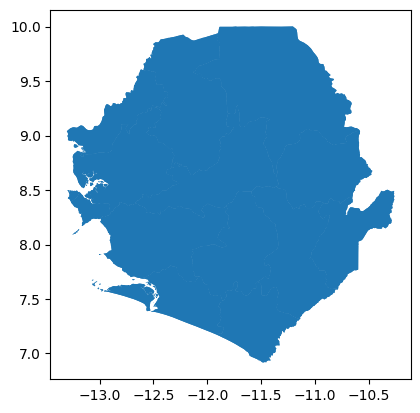

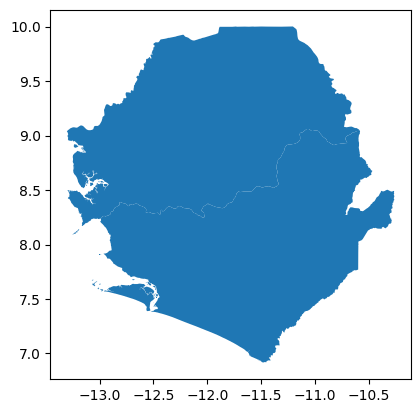

In [34]:
gdf_original[[True if x.startswith("SLE") else False for x in gdf_original.gid_1]].plot()
gdf_original[[True if x.startswith("SLE") else False for x in gdf_original.gid_1]].name_1.unique()

sle_geo_zones = {
    "SLE_NR": ["Northern", "Western"],
    "SLE_SR": ["Eastern", "Southern"]
}

gdf_original["sle_region_name"] = None


for sle_region_name, sle_subregions in sle_geo_zones.items():
    for idx, row in gdf_original.iterrows():
        if row.loc["name_1"] in sle_subregions:
            gdf_original.at[idx, "sle_region_name"] = sle_region_name


sle_grouped_data_test = gdf_original[gdf_original["gid_0"]=="SLE"].groupby("sle_region_name")[numeric_cols].sum().reset_index()
sle_dissolved_test = gdf_original[gdf_original["gid_0"]=="SLE"].dissolve(by="sle_region_name", as_index=False)[["sle_region_name", "geometry"]]

sle_merged_gdf_test = sle_dissolved_test.merge(sle_grouped_data_test, on="sle_region_name")
sle_merged_gdf_test.plot()
sle_merged_gdf_test

name_1                                           geometry  00gwkm32  \
0     Agadez  POLYGON ((6.64809 15.6886, 6.58504 15.89849, 6...       460   
1      Diffa  POLYGON ((12.37039 13.07662, 12.36875 13.07846...       318   
2      Dosso  POLYGON ((3.61768 11.91665, 3.61872 11.9025, 3...       298   
3     Maradi  POLYGON ((7.14255 13.02606, 7.13639 13.02316, ...       114   
4     Niamey  POLYGON ((2.2284 13.53191, 2.2215 13.53191, 2....         2   
5     Tahoua  POLYGON ((5.17171 13.7461, 5.16465 13.74456, 5...       374   
6  Tillabéry  POLYGON ((2.62115 12.5846, 2.62528 12.58322, 2...       814   
7     Zinder  POLYGON ((9.16683 12.83215, 9.16656 12.83222, ...       564   

   00gwkm33  00gwkm34  00gwkm35  00h2withwater  00lhekg20  00lhekg30  \
0       460       460       460   1.510041e+06      25.92      17.06   
1       318       318       318   1.059179e+06      26.98      18.08   
2       298       298       298   9.942028e+05      46.44      30.96   
3       114       114       114   3.817772e+05      56.26      38.34   
4         2         2         2   4.702868e+03       9.14       5.88   
5       374       374       374   1.251427e+06      62.86      41.42   
6       814       814       814   2.717160e+06      54.36      35.82   
7       564       564       564   1.875469e+06      45.32      30.08   

   00lhekg40  ...  na25ltekg3  na25ltekg4  na25ltekg5  na50ltekg2  na50ltekg3  \
0      14.12  ...       15.66       12.78       11.16       23.88       15.72   
1      15.10  ...       15.66       12.78       11.16       23.88       15.72   
2      25.78  ...       26.10       21.30       18.60       39.80       26.20   
3      32.26  ...       31.32       25.56       22.32       47.76       31.44   
4       4.82  ...        5.22        4.26        3.72        7.96        5.24   
5      34.32  ...       36.54       29.82       26.04       55.72       36.68   
6      29.66  ...       31.32       25.56       22.32       47.76       31.44   
7      25.00  ...       26.10       21.30       18.60       39.80       26.20   

   na50ltekg4  na50ltekg5  nagtpperc   nasptwha    natptwha  
0       12.84       11.16       52.2  29444.256  338822.598  
1       12.84       11.16       52.2  29444.256  338822.598  
2       21.40       18.60       87.0  49073.760  564704.330  
3       25.68       22.32      104.4  58888.512  677645.196  
4        4.28        3.72       17.4   9814.752  112940.866  
5       29.96       26.04      121.8  68703.264  790586.062  
6       25.68       22.32      104.4  58888.512  677645.196  
7       21.40       18.60       87.0  49073.760  564704.330  

[8 rows x 368 columns]

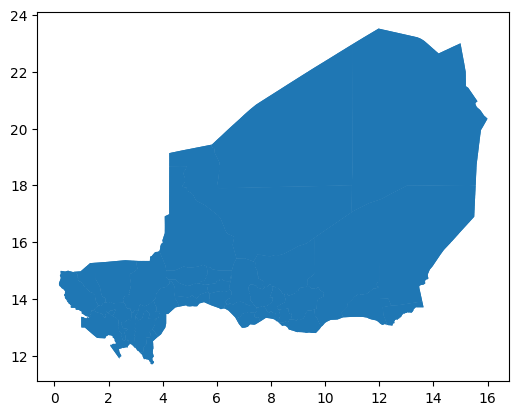

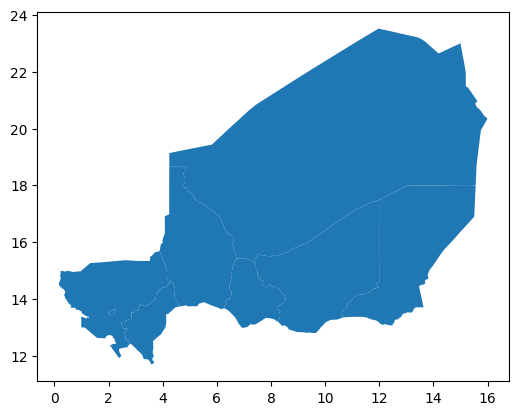

In [35]:
gdf_original[[True if x.startswith("NER") else False for x in gdf_original.gid_1]].plot()
gdf_original[[True if x.startswith("NER") else False for x in gdf_original.gid_1]].name_1.unique()

ner_gdf = gdf_original[gdf_original["gid_0"] == "NER"]

ner_grouped_data = ner_gdf.groupby("name_1")[numeric_cols].sum().reset_index()
ner_dissolved = ner_gdf.dissolve(by="name_1", as_index=False)[["name_1", "geometry"]]

ner_merged_gdf = ner_dissolved.merge(ner_grouped_data, on="name_1")
ner_merged_gdf.plot()
ner_merged_gdf

In [36]:
ner_merged_gdf["00tpgwha"]

0    7.718155e+07
1    1.097022e+07
2    9.942028e+05
3    4.016069e+05
4    4.702868e+03
5    9.973977e+06
6    5.814984e+06
7    7.599620e+06
Name: 00tpgwha, dtype: float64

name_1                                           geometry  00gwkm32  \
0     Bamako  POLYGON ((-7.907 12.61047, -7.92735 12.58739, ...         0   
1        Gao  POLYGON ((0.68919 14.94895, 0.67215 14.95434, ...       440   
2      Kayes  POLYGON ((-10.52878 12.03569, -10.53098 12.033...       534   
3      Kidal  POLYGON ((1.14598 17.72955, 1.13891 17.73757, ...       156   
4  Koulikoro  POLYGON ((-8.53201 11.51738, -8.53516 11.51685...       250   
5      Mopti  POLYGON ((-4.59158 13.6184, -4.59675 13.62029,...       224   
6    Sikasso  POLYGON ((-6.25642 10.73664, -6.26717 10.73269...       434   
7      Ségou  POLYGON ((-5.23821 12.81012, -5.24101 12.81012...       128   
8   Timbuktu  POLYGON ((-3.65124 15.48267, -3.65527 15.48498...       450   

   00gwkm33  00gwkm34  00gwkm35  00h2withwater  00lhekg20  00lhekg30  \
0         0         0         0   0.000000e+00       9.24       5.92   
1       440       440       440   1.451614e+06      35.74      23.74   
2       534       534       534   1.788740e+06      66.28      43.62   
3       156       156       156   5.171014e+05      35.42      23.34   
4       250       250       250   8.339012e+05      67.64      44.76   
5       224       224       224   7.415766e+05      83.42      58.98   
6       434       434       434   1.448189e+06      67.04      42.98   
7       128       128       128   4.274427e+05      70.54      49.00   
8       450       450       450   1.500645e+06      45.36      30.54   

   00lhekg40  ...  na25ltekg3  na25ltekg4  na25ltekg5  na50ltekg2  na50ltekg3  \
0       4.84  ...        5.42        4.44        3.86        8.14        5.46   
1      19.72  ...       21.68       17.76       15.44       32.56       21.84   
2      36.08  ...       37.94       31.08       27.02       56.98       38.22   
3      19.34  ...       21.68       17.76       15.44       32.56       21.84   
4      37.18  ...       37.94       31.08       27.02       56.98       38.22   
5      50.46  ...       43.36       35.52       30.88       65.12       43.68   
6      35.14  ...       37.94       31.08       27.02       56.98       38.22   
7      41.60  ...       37.94       31.08       27.02       56.98       38.22   
8      25.54  ...       27.10       22.20       19.30       40.70       27.30   

   na50ltekg4  na50ltekg5  nagtpperc   nasptwha    natptwha  
0        4.44        3.88       15.8   8716.454  110706.324  
1       17.76       15.52       63.2  34865.816  442825.296  
2       31.08       27.16      110.6  61015.178  774944.268  
3       17.76       15.52       63.2  34865.816  442825.296  
4       31.08       27.16      110.6  61015.178  774944.268  
5       35.52       31.04      126.4  69731.632  885650.592  
6       31.08       27.16      110.6  61015.178  774944.268  
7       31.08       27.16      110.6  61015.178  774944.268  
8       22.20       19.40       79.0  43582.270  553531.620  

[9 rows x 368 columns]

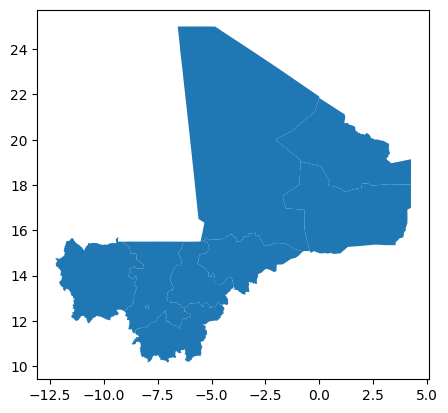

In [41]:
# Filter Mali data
mli_gdf = gdf_original[gdf_original["gid_0"] == "MLI"]
mli_grouped_data = mli_gdf.groupby("name_1")[numeric_cols].sum().reset_index()
mli_dissolved = mli_gdf.dissolve(by="name_1", as_index=False)[["name_1", "geometry"]]
mli_merged_gdf = mli_dissolved.merge(mli_grouped_data, on="name_1")
mli_merged_gdf.plot()
mli_merged_gdf

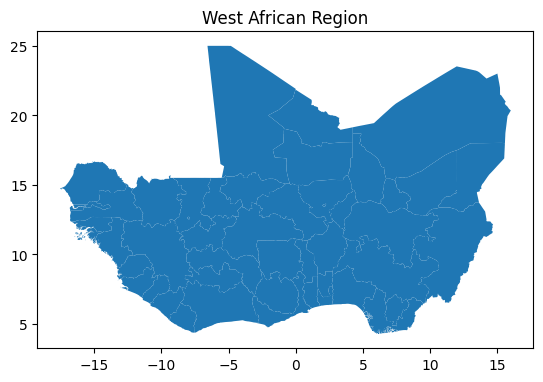

name_1                                           geometry  \
0          Agadez  POLYGON ((6.64809 15.6886, 6.58504 15.89849, 6...   
1           Diffa  POLYGON ((12.37039 13.07662, 12.36875 13.07846...   
2           Dosso  POLYGON ((3.61768 11.91665, 3.61872 11.9025, 3...   
3          Maradi  POLYGON ((7.14255 13.02606, 7.13639 13.02316, ...   
4          Niamey  POLYGON ((2.2284 13.53191, 2.2215 13.53191, 2....   
5          Tahoua  POLYGON ((5.17171 13.7461, 5.16465 13.74456, 5...   
6       Tillabéry  POLYGON ((2.62115 12.5846, 2.62528 12.58322, 2...   
7          Zinder  POLYGON ((9.16683 12.83215, 9.16656 12.83222, ...   
8          Bamako  POLYGON ((-7.907 12.61047, -7.92735 12.58739, ...   
9             Gao  POLYGON ((0.68919 14.94895, 0.67215 14.95434, ...   
10          Kayes  POLYGON ((-10.52878 12.03569, -10.53098 12.033...   
11          Kidal  POLYGON ((1.14598 17.72955, 1.13891 17.73757, ...   
12      Koulikoro  POLYGON ((-8.53201 11.51738, -8.53516 11.51685...   
13          Mopti  POLYGON ((-4.59158 13.6184, -4.59675 13.62029,...   
14        Sikasso  POLYGON ((-6.25642 10.73664, -6.26717 10.73269...   
15          Ségou  POLYGON ((-5.23821 12.81012, -5.24101 12.81012...   
16       Timbuktu  POLYGON ((-3.65124 15.48267, -3.65527 15.48498...   
17         SLE_NR  MULTIPOLYGON (((-13.24236 8.09986, -13.24236 8...   
18         SLE_SR  MULTIPOLYGON (((-12.98653 7.59125, -12.98625 7...   
19         GMB_AR  MULTIPOLYGON (((-16.6905 13.16431, -16.69035 1...   
20         SEN_NR  MULTIPOLYGON (((-16.65347 13.64736, -16.65347 ...   
21         SEN_SR  MULTIPOLYGON (((-16.50829 12.35051, -16.50995 ...   
22        GNB_NER  MULTIPOLYGON (((-16.08403 11.75736, -16.08542 ...   
23        GNB_SCR  MULTIPOLYGON (((-16.13931 11.02542, -16.13931 ...   
24         GIN_IG  POLYGON ((-11.89825 9.94571, -11.90165 9.94166...   
25         GIN_LG  MULTIPOLYGON (((-14.95125 10.84236, -14.94847 ...   
26         LBR_CZ  MULTIPOLYGON (((-10.20875 6.01292, -10.20875 6...   
27         LBR_NZ  POLYGON ((-11.15431 6.61903, -11.15431 6.61931...   
28         LBR_SZ  POLYGON ((-8.37569 4.64681, -8.37569 4.64708, ...   
29         GHA_MZ  POLYGON ((-2.14867 6.35273, -2.15862 6.35324, ...   
30         GHA_NZ  POLYGON ((-1.95843 8.16998, -1.97106 8.1635, -...   
31         GHA_SZ  MULTIPOLYGON (((-2.03625 4.75375, -2.03542 4.7...   
32        BFA_NEZ  POLYGON ((-2.48154 12.61973, -2.48148 12.62506...   
33        BFA_SCZ  POLYGON ((-4.17318 9.78263, -4.17767 9.7781, -...   
34         TGO_NZ  POLYGON ((1.23667 8.36084, 1.23333 8.35695, 1....   
35         TGO_SZ  MULTIPOLYGON (((1.39292 6.18014, 1.39236 6.180...   
36  North Central  POLYGON ((5.51688 8.07148, 5.51387 8.07084, 5....   
37     North East  POLYGON ((10.14893 7.03428, 10.14689 7.03187, ...   
38     North West  POLYGON ((4.65131 10.58562, 4.66442 10.59904, ...   
39     South East  POLYGON ((6.79456 5.21832, 6.7818 5.22892, 6.7...   
40    South South  MULTIPOLYGON (((5.60375 4.73681, 5.60347 4.736...   
41     South West  MULTIPOLYGON (((3.04875 6.39931, 3.04458 6.399...   
42         BEN_CZ  POLYGON ((2.33389 6.93028, 2.31639 6.92944, 2....   
43         BEN_NZ  POLYGON ((1.3648 9.48525, 1.36239 9.48598, 1.3...   
44         BEN_SZ  MULTIPOLYGON (((1.86069 6.28958, 1.86069 6.289...   
45         CIV_CZ  POLYGON ((-4.89305 7.56258, -4.8946 7.56005, -...   
46         CIV_NZ  POLYGON ((-7.12298 9.03037, -7.1264 9.02526, -...   
47         CIV_SZ  MULTIPOLYGON (((-6.66875 4.72653, -6.66903 4.7...   

    00gwkm32  00gwkm33  00gwkm34  00gwkm35  00h2withwater  00lhekg20  \
0        460       460       460       460   1.510041e+06      25.92   
1        318       318       318       318   1.059179e+06      26.98   
2        298       298       298       298   9.942028e+05      46.44   
3        114       114       114       114   3.817772e+05      56.26   
4          2         2         2         2   4.702868e+03       9.14   
5        374       374       374       374   1.251

In [42]:
import geopandas as gpd
import pandas as pd


merged_gdf_list = [
    ner_merged_gdf, mli_merged_gdf, sle_merged_gdf_test, gmb_merged_gdf_test, sen_merged_gdf_test,
    gnb_merged_gdf_test, gin_merged_gdf_test, lbr_merged_gdf_test, gha_merged_gdf_test, bfa_merged_gdf_test,
    TGO_merged_gdf_test, nga_merged_gdf_test, BEN_merged_gdf_test, CIV_merged_gdf_test
]

first_column_name = ner_merged_gdf.columns[0]
common_columns = ner_merged_gdf.columns[1:].tolist()
aligned_gdf_list = []
for gdf in merged_gdf_list:
    
    gdf = gdf.rename(columns={gdf.columns[0]: first_column_name})
    
    gdf = gdf[[first_column_name] + common_columns]
    aligned_gdf_list.append(gdf)

west_africa_gdf = pd.concat(aligned_gdf_list, ignore_index=True)
west_africa_gdf = gpd.GeoDataFrame(west_africa_gdf, geometry='geometry', crs=merged_gdf_list[0].crs)
west_africa_gdf.plot()
plt.title("West African Region")
plt.show()

west_africa_gdf

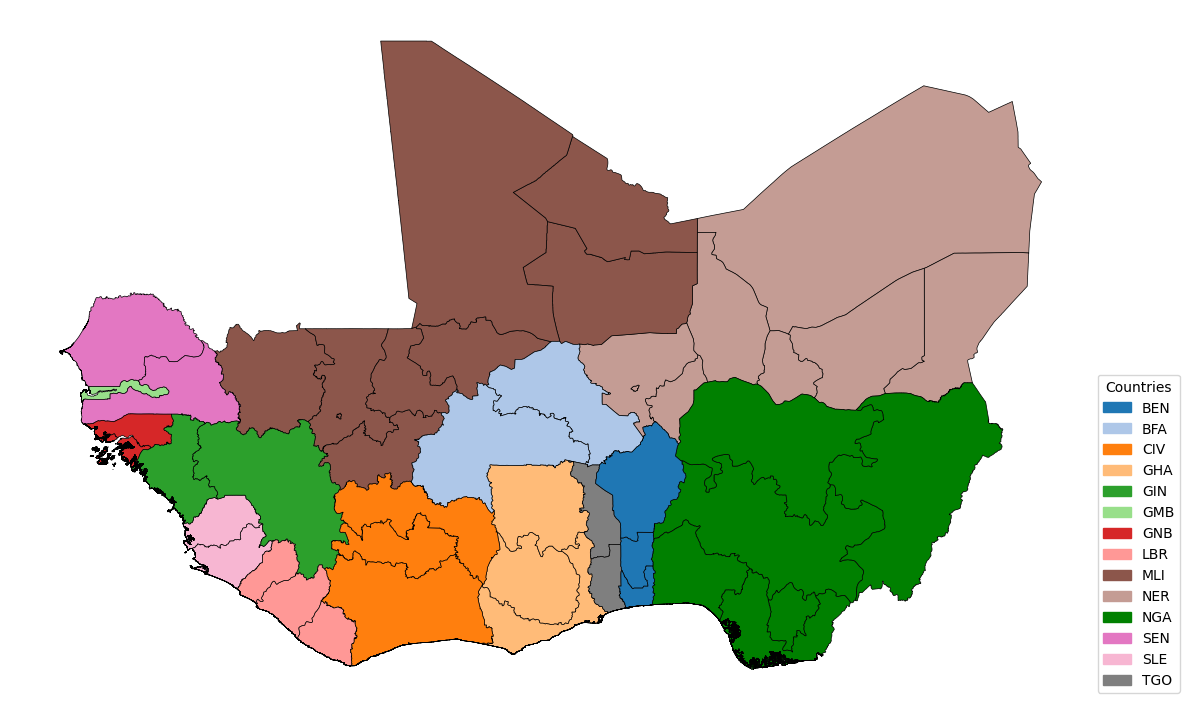

In [40]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import to_rgb
import colorsys

country_regions = {
    'NER': ["Agadez", "Diffa", "Dosso", "Maradi", "Niamey", "Tahoua", "Tillabéry", "Zinder"],
    'MLI': ["Bamako", "Gao", "Kayes", "Kidal", "Koulikoro", "Mopti", "Sikasso", "Ségou", "Timbuktu"],
    'SLE': ["SLE_NR", "SLE_SR"],
    'GMB': ["GMB_AR"],
    'SEN': ["SEN_NR", "SEN_SR"],
    'GNB': ["GNB_NER", "GNB_SCR"],
    'GIN': ["GIN_IG", "GIN_LG"],
    'LBR': ["LBR_CZ", "LBR_NZ", "LBR_SZ"],
    'GHA': ["GHA_MZ", "GHA_NZ", "GHA_SZ"],
    'BFA': ["BFA_NEZ", "BFA_SCZ"],
    'TGO': ["TGO_NZ", "TGO_SZ"],
    'NGA': ["North Central", "North East", "North West", "South East", "South South", "South West"],
    'BEN': ["BEN_CZ", "BEN_NZ", "BEN_SZ"],
    'CIV': ["CIV_CZ", "CIV_NZ", "CIV_SZ"]
}

def assign_country_code(region_name):
    for iso, regions in country_regions.items():
        if region_name in regions:
            return iso
    return "Other"

west_africa_gdf['iso_code'] = west_africa_gdf['name_1'].apply(assign_country_code)

filtered_gdf = west_africa_gdf[west_africa_gdf['iso_code'] != 'Other']
unique_countries = filtered_gdf['iso_code'].unique()
def is_purple(color):
    r, g, b = to_rgb(color)
    h, s, v = colorsys.rgb_to_hsv(r, g, b)
    return 0.72 <= h <= 0.85  

cmap = plt.get_cmap('tab20')
valid_colors = [cmap(i) for i in range(cmap.N) if not is_purple(cmap(i))]
color_dict = {'NGA': 'green'}
i = 0
for code in sorted(unique_countries): 
    if code == 'NGA':
        continue
    color_dict[code] = valid_colors[i % len(valid_colors)]
    i += 1
filtered_gdf['color'] = filtered_gdf['iso_code'].map(color_dict)
fig, ax = plt.subplots(figsize=(12, 12))
filtered_gdf.plot(ax=ax, color=filtered_gdf['color'], edgecolor='black', linewidth=0.5)
legend_patches = [mpatches.Patch(color=color_dict[code], label=code) for code in sorted(unique_countries)]
plt.legend(handles=legend_patches, title="Countries", loc='lower left', bbox_to_anchor=(1, 0), fontsize='medium')

plt.axis('off')
plt.tight_layout()
fig.savefig("west_africa_country_48_regions.jpeg", format='jpeg', dpi=300)
plt.show()

(0.0, 1000000.0)

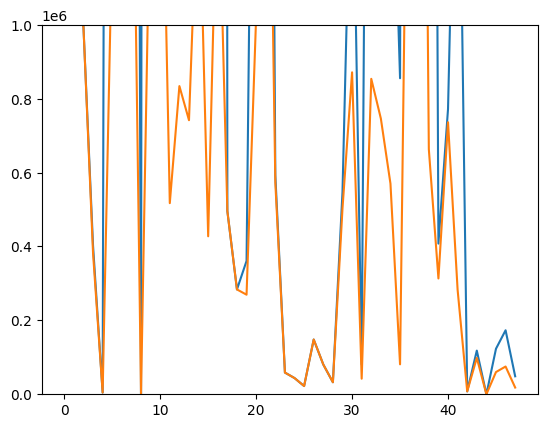

In [43]:
west_africa_gdf["00tpgwha"].plot()
west_africa_gdf["00h2withwater"].plot()
plt.ylim(0, 10e5)

In [44]:
west_africa_gdf["70h2withwater"].sum() / west_africa_gdf["70tpgwha"].sum()

0.1267495298978455

In [45]:
WA_h2_potentials_keys = []
for col in west_africa_gdf.columns:
    if "tpgwha" in col:
        WA_h2_potentials_keys.append(col)

In [46]:
WA_h2_water_potentials_keys = []
for col in west_africa_gdf.columns:
    if "h2withwater" in col:
        WA_h2_water_potentials_keys.append(col)

In [47]:
WA_h2_potentials_keys

['00tpgwha',
 '01tpgwha',
 '02tpgwha',
 '04tpgwha',
 '06tpgwha',
 '10tpgwha',
 '15tpgwha',
 '20tpgwha',
 '25tpgwha',
 '30tpgwha',
 '50tpgwha',
 '70tpgwha',
 '75tpgwha',
 '80tpgwha',
 '85tpgwha',
 '90tpgwha',
 '96tpgwha',
 '98tpgwha',
 '99tpgwha',
 'h2tpgwha']

In [48]:
WA_h2_water_potentials_keys

['00h2withwater',
 '01h2withwater',
 '02h2withwater',
 '04h2withwater',
 '06h2withwater',
 '10h2withwater',
 '15h2withwater',
 '20h2withwater',
 '25h2withwater',
 '30h2withwater',
 '50h2withwater',
 '70h2withwater',
 '75h2withwater',
 '80h2withwater',
 '85h2withwater',
 '90h2withwater',
 '96h2withwater',
 '98h2withwater',
 '99h2withwater',
 'h2h2withwater']

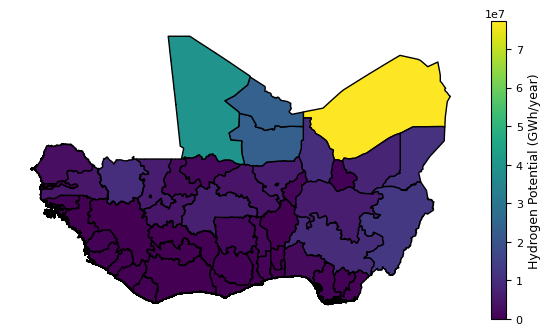

In [50]:
import matplotlib.pyplot as plt
import matplotlib as mpl

WA_h2_potential = WA_h2_potentials_keys[0]
fig, ax = plt.subplots()
west_africa_gdf.plot(
    column=WA_h2_potential,
    cmap="viridis",
    edgecolor="black",
    ax=ax,
    legend=False
)

# Normalization
vmin = west_africa_gdf[WA_h2_potential].min()
vmax = west_africa_gdf[WA_h2_potential].max()
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

sm = mpl.cm.ScalarMappable(cmap="viridis", norm=norm)
sm._A = []

cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.04)
cbar.set_label("Hydrogen Potential (GWh/year)", fontsize=9)
cbar.ax.tick_params(labelsize=8)
cbar.ax.yaxis.get_offset_text().set_fontsize(8)

ax.axis("off")
fig.savefig(
    "Maximum_Green_Hydrogen_potential_West_Africa.jpeg",
    format="jpeg",
    dpi=300,
    bbox_inches="tight",
    pad_inches=0
)

plt.show()

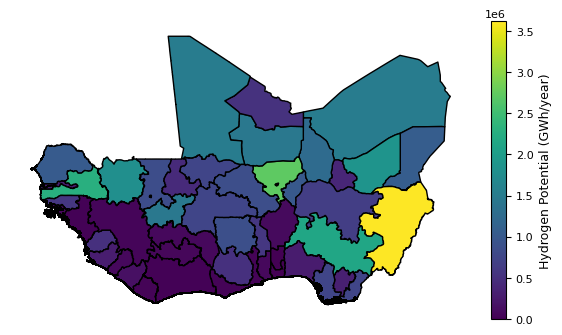

In [51]:
import matplotlib.pyplot as plt
import matplotlib as mpl

WA_h2_water_potential = WA_h2_water_potentials_keys[0]
fig, ax = plt.subplots()
west_africa_gdf.plot(
    column=WA_h2_water_potential,
    cmap="viridis",
    edgecolor="black",
    ax=ax,
    legend=False
)

# Normalization
vmin = west_africa_gdf[WA_h2_water_potential].min()
vmax = west_africa_gdf[WA_h2_water_potential].max()
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
sm = mpl.cm.ScalarMappable(cmap="viridis", norm=norm)
sm._A = []
cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.04)
cbar.set_label("Hydrogen Potential (GWh/year)", fontsize=9)
cbar.ax.tick_params(labelsize=8)
cbar.ax.yaxis.get_offset_text().set_fontsize(8)
ax.axis("off")
fig.savefig(
    "Green_Hydrogen_Groundwater_potential_West_Africa.jpeg",
    format="jpeg",
    dpi=300,
    bbox_inches="tight",
    pad_inches=0
)

plt.show()

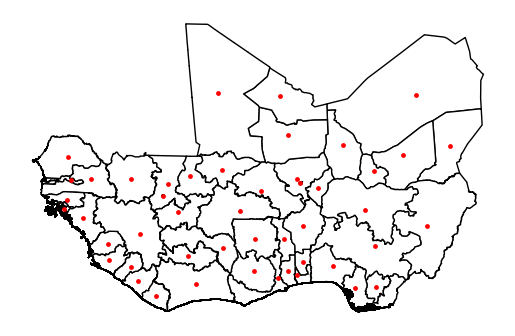

In [55]:
import matplotlib.pyplot as plt

west_africa_gdf_32630['centroid'] = west_africa_gdf_32630.geometry.representative_point()
fig, ax = plt.subplots()
west_africa_gdf_32630.plot(ax=ax, color='white', edgecolor='black')
west_africa_gdf_32630.set_geometry('centroid').plot(ax=ax, color='red', markersize=6)
ax.axis("off")
fig.savefig(
    "West_Africa_region_with_centroid.jpeg",
    format="jpeg",
    dpi=300,
    bbox_inches="tight",
    pad_inches=0
)
plt.show()

In [88]:
west_africa_gdf_32630[["name_1", "25tpgwha", "25h2withwater", "50tpgwha", "50h2withwater", "75tpgwha", "75h2withwater", "00tpgwha", "00h2withwater"]]

name_1      25tpgwha  25h2withwater      50tpgwha  50h2withwater  \
0          Agadez  1.929539e+07  377510.292398  3.859078e+07   7.550206e+05   
1           Diffa  2.742555e+06  264794.771929  5.485111e+06   5.295895e+05   
2           Dosso  2.485507e+05  248550.696500  4.971014e+05   4.971014e+05   
3          Maradi  1.004017e+05   95444.290068  2.008034e+05   1.908886e+05   
4          Niamey  1.175717e+03    1175.717000  2.351434e+03   2.351434e+03   
5          Tahoua  2.493494e+06  312856.698590  4.986989e+06   6.257134e+05   
6       Tillabéry  1.453746e+06  679289.910870  2.907492e+06   1.358580e+06   
7          Zinder  1.899905e+06  468867.351360  3.799810e+06   9.377347e+05   
8          Bamako  1.332920e+02       0.000000  2.665840e+02   0.000000e+00   
9             Gao  5.772211e+06  362903.422025  1.154442e+07   7.258068e+05   
10          Kayes  2.550084e+06  447184.912027  5.100168e+06   8.943698e+05   
11          Kidal  5.953644e+06  129275.355706  1.190729e+07   2.585507e+05   
12      Koulikoro  1.480733e+06  208475.306728  2.961465e+06   4.169506e+05   
13          Mopti  4.357505e+05  185394.146370  8.715011e+05   3.707883e+05   
14        Sikasso  1.123594e+06  362047.215473  2.247188e+06   7.240944e+05   
15          Ségou  4.550862e+05  106860.687354  9.101724e+05   2.137214e+05   
16       Timbuktu  9.905346e+06  375161.178819  1.981069e+07   7.503224e+05   
17         SLE_NR  1.239038e+05  123903.751500  2.478075e+05   2.478075e+05   
18         SLE_SR  7.091233e+04   70912.325500  1.418247e+05   1.418247e+05   
19         GMB_AR  9.019036e+04   67358.067516  1.803807e+05   1.347161e+05   
20         SEN_NR  6.883617e+05  255487.493237  1.376723e+06   5.109750e+05   
21         SEN_SR  1.162026e+06  571870.601357  2.324052e+06   1.143741e+06   
22        GNB_NER  1.481155e+05  143106.357920  2.962310e+05   2.862127e+05   
23        GNB_SCR  1.468088e+04   14680.884000  2.936177e+04   2.936177e+04   
24         GIN_IG  1.096502e+04   10965.017000  2.193003e+04   2.193003e+04   
25         GIN_LG  5.575684e+03    5575.683500  1.115137e+04   1.115137e+04   
26         LBR_CZ  3.703951e+04   37039.507500  7.407901e+04   7.407901e+04   
27         LBR_NZ  2.013787e+04   20137.865500  4.027573e+04   4.027573e+04   
28         LBR_SZ  8.128573e+03    8128.572500  1.625715e+04   1.625715e+04   
29         GHA_MZ  1.366766e+05  125676.532075  2.733531e+05   2.513531e+05   
30         GHA_NZ  4.033389e+05  217766.050153  8.066779e+05   4.355321e+05   
31         GHA_SZ  2.019694e+04   10533.345812  4.039388e+04   2.106669e+04   
32        BFA_NEZ  9.804304e+05  213362.782387  1.960861e+06   4.267256e+05   
33        BFA_SCZ  1.682833e+06  186493.906125  3.365667e+06   3.729878e+05   
34         TGO_NZ  4.255921e+05  142496.246025  8.511842e+05   2.849925e+05   
35         TGO_SZ  2.137717e+05   20259.811441  4.275434e+05   4.051962e+04   
36  North Central  2.340769e+06  536629.586882  4.681538e+06   1.073259e+06   
37     North East  3.120834e+06  904143.915547  6.241669e+06   1.808288e+06   
38     North West  1.525752e+06  165738.402575  3.051504e+06   3.314768e+05   
39     South East  1.019045e+05   78326.147728  2.038090e+05   1.566523e+05   
40    South South  1.929483e+05  184005.527394  3.858965e+05   3.680111e+05   
41     South West  4.728315e+05   70614.457405  9.456630e+05   1.412289e+05   
42         BEN_CZ  1.946178e+03    1946.177500  3.892355e+03   3.892355e+03   
43         BEN_NZ  2.954183e+04   24633.504832  5.908367e+04   4.926701e+04   
44         BEN_SZ  0.000000e+00       0.000000  0.000000e+00   0.000000e+00   
45         CIV_CZ  3.080802e+04   15036.954680  6.161605e+04   3.007391e+04   
46         CIV_NZ  4.329317e+04   18774.233822  8.658634e+04   3.754847e+04   
47         CIV_SZ  1.215769e+04    4552.088795  2.431538e+04   9.104178e+03   

        75tpgwha  75h2withwater      00tpgwha  00h2withwater  
0   5.788616e+07   1.132531e+06  7.718155e+07   1.510041e+06  
1   8.227666e

In [56]:
west_africa_gdf_32630[["name_1", "00h2withwater"]]

name_1  00h2withwater
0          Agadez   1.510041e+06
1           Diffa   1.059179e+06
2           Dosso   9.942028e+05
3          Maradi   3.817772e+05
4          Niamey   4.702868e+03
5          Tahoua   1.251427e+06
6       Tillabéry   2.717160e+06
7          Zinder   1.875469e+06
8          Bamako   0.000000e+00
9             Gao   1.451614e+06
10          Kayes   1.788740e+06
11          Kidal   5.171014e+05
12      Koulikoro   8.339012e+05
13          Mopti   7.415766e+05
14        Sikasso   1.448189e+06
15          Ségou   4.274427e+05
16       Timbuktu   1.500645e+06
17         SLE_NR   4.956150e+05
18         SLE_SR   2.836493e+05
19         GMB_AR   2.694323e+05
20         SEN_NR   1.021950e+06
21         SEN_SR   2.287482e+06
22        GNB_NER   5.724254e+05
23        GNB_SCR   5.872354e+04
24         GIN_IG   4.386007e+04
25         GIN_LG   2.230273e+04
26         LBR_CZ   1.481580e+05
27         LBR_NZ   8.055146e+04
28         LBR_SZ   3.251429e+04
29         GHA_MZ   5.027061e+05
30         GHA_NZ   8.710642e+05
31         GHA_SZ   4.213338e+04
32        BFA_NEZ   8.534511e+05
33        BFA_SCZ   7.459756e+05
34         TGO_NZ   5.699850e+05
35         TGO_SZ   8.103925e+04
36  North Central   2.146518e+06
37     North East   3.616576e+06
38     North West   6.629536e+05
39     South East   3.133046e+05
40    South South   7.360221e+05
41     South West   2.824578e+05
42         BEN_CZ   7.784710e+03
43         BEN_NZ   9.853402e+04
44         BEN_SZ   0.000000e+00
45         CIV_CZ   6.014782e+04
46         CIV_NZ   7.509694e+04
47         CIV_SZ   1.820836e+04

In [82]:
west_africa_gdf_32630.to_parquet("west_africa_h2atlas_processed_data_32630.parquet")

In [83]:
output_path = "west_Africa_h2atlas_processed_data_EPSG32630.shp"
west_africa_gdf_32630.to_parquet(output_path)

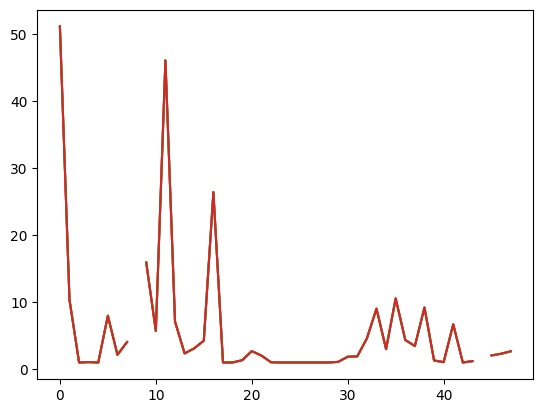

In [84]:
scenario_pairs = [("25tpgwha", "25h2withwater"), 
                  ("50tpgwha", "50h2withwater"), 
                  ("75tpgwha", "75h2withwater"), 
                  ("00tpgwha", "00h2withwater")]

plt.figure()

for pair in scenario_pairs:
    plt.plot(west_africa_gdf_32630[pair[0]] / west_africa_gdf_32630[pair[1]])

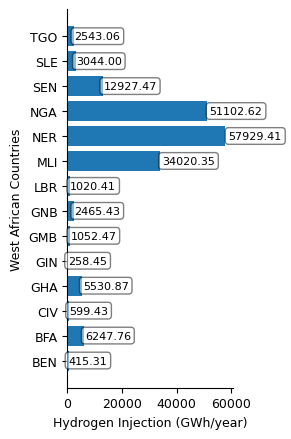

HYDROGEN POTENTIAL FROM GROUNDWATER - WEST AFRICAN COUNTRIES

CUMULATIVE VALUES BY SCALING FACTOR:
Regions divided by 140: 89,313.87 GWh/year
Regions divided by 256: 89,843.16 GWh/year
Total hydrogen potential: 179,157.03 GWh/year

COUNTRY-WISE HYDROGEN POTENTIAL (GWh/year):
BEN: 415.31 GWh/year
BFA: 6,247.76 GWh/year
CIV: 599.43 GWh/year
GHA: 5,530.87 GWh/year
GIN: 258.45 GWh/year
GMB: 1,052.47 GWh/year
GNB: 2,465.43 GWh/year
LBR: 1,020.41 GWh/year
MLI: 34,020.35 GWh/year
NER: 57,929.41 GWh/year
NGA: 51,102.62 GWh/year
SEN: 12,927.47 GWh/year
SLE: 3,044.00 GWh/year
TGO: 2,543.06 GWh/year

REGIONS DIVIDED BY 140 (Higher Scaling Factor):
Agadez (NER): 10786.01 GWh/year
Diffa (NER): 7565.56 GWh/year
Maradi (NER): 2726.98 GWh/year
North Central (NGA): 15332.27 GWh/year
North East (NGA): 25832.68 GWh/year
North West (NGA): 4735.38 GWh/year
Tahoua (NER): 8938.76 GWh/year
Zinder (NER): 13396.21 GWh/year

REGIONS DIVIDED BY 256 (Lower Scaling Factor):
BEN_CZ (BEN): 30.41 GWh/year
BEN_NZ (BEN)

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

west_african_countries = ['BEN', 'BFA', 'CIV', 'GHA', 'GIN', 'GMB', 'GNB', 'LBR', 'MLI', 'NER', 'NGA', 'SEN', 'SLE', 'TGO']

region_to_country = {
    # BEN regions
    'BEN_CZ': 'BEN', 'BEN_NZ': 'BEN', 'BEN_SZ': 'BEN',
    # BFA regions
    'BFA_NEZ': 'BFA', 'BFA_SCZ': 'BFA',
    # CIV regions
    'CIV_CZ': 'CIV', 'CIV_NZ': 'CIV', 'CIV_SZ': 'CIV',
    # GHA regions
    'GHA_MZ': 'GHA', 'GHA_NZ': 'GHA', 'GHA_SZ': 'GHA',
    # GIN regions
    'GIN_IG': 'GIN', 'GIN_LG': 'GIN',
    # GMB regions
    'GMB_AR': 'GMB',
    # GNB regions
    'GNB_NER': 'GNB', 'GNB_SCR': 'GNB',
    # LBR regions
    'LBR_CZ': 'LBR', 'LBR_NZ': 'LBR', 'LBR_SZ': 'LBR',
    # MLI regions
    'Bamako': 'MLI', 'Gao': 'MLI', 'Kayes': 'MLI', 'Kidal': 'MLI', 
    'Koulikoro': 'MLI', 'Mopti': 'MLI', 'Sikasso': 'MLI', 'Ségou': 'MLI', 'Timbuktu': 'MLI',
    # NER regions
    'Agadez': 'NER', 'Diffa': 'NER', 'Dosso': 'NER', 'Maradi': 'NER', 
    'Niamey': 'NER', 'Tahoua': 'NER', 'Tillabéry': 'NER', 'Zinder': 'NER',
    # NGA regions
    'North Central': 'NGA', 'North East': 'NGA', 'North West': 'NGA', 
    'South East': 'NGA', 'South South': 'NGA', 'South West': 'NGA',
    # SEN regions
    'SEN_NR': 'SEN', 'SEN_SR': 'SEN',
    # SLE regions
    'SLE_NR': 'SLE', 'SLE_SR': 'SLE',
    # TGO regions
    'TGO_NZ': 'TGO', 'TGO_SZ': 'TGO'
}

regions_divide_by_140 = [
    'Agadez', 'Zinder', 'Diffa', 'Maradi', 'Tahoua', 
    'North Central', 'North East', 'North West'
]

filtered_data = west_africa_gdf_32630[
    (west_africa_gdf_32630['name_1'].isin(region_to_country.keys())) &
    (west_africa_gdf_32630['00h2withwater'].notna())
].copy()
filtered_data['country'] = filtered_data['name_1'].map(region_to_country)
def apply_scaling(row):
    if row['name_1'] in regions_divide_by_140:
        return row['00h2withwater'] / 140
    else:
        return row['00h2withwater'] / 256

filtered_data['scaled_h2'] = filtered_data.apply(apply_scaling, axis=1)

regions_140_data = filtered_data[filtered_data['name_1'].isin(regions_divide_by_140)]
regions_256_data = filtered_data[~filtered_data['name_1'].isin(regions_divide_by_140)]

cumulative_140 = regions_140_data['scaled_h2'].sum()
cumulative_256 = regions_256_data['scaled_h2'].sum()
country_totals = filtered_data.groupby('country')['scaled_h2'].sum()
country_hydrogen = pd.Series(0.0, index=west_african_countries)
country_hydrogen.update(country_totals)
plt.figure(figsize=(3, 4.5))
bars = plt.barh(country_hydrogen.index, country_hydrogen.values)
plt.xlabel('Hydrogen Injection (GWh/year)', fontsize=9, fontweight='normal')
plt.ylabel('West African Countries', fontsize=9, fontweight='normal')
plt.tick_params(axis='y', labelsize=9) 
plt.tick_params(axis='x', labelsize=9)  
for bar in bars:
    width = bar.get_width()
    plt.text(width + width*0.02, bar.get_y() + bar.get_height()/2.,
             f'{width:.2f}', ha='left', va='center', fontsize=8, 
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.5))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig('west_african_hydrogen_groundwater_potential scenario 5.jpg', format='jpeg', dpi=300, bbox_inches='tight')
plt.show()
print("="*70)
print("HYDROGEN POTENTIAL FROM GROUNDWATER - WEST AFRICAN COUNTRIES")
print("="*70)

print(f"\nCUMULATIVE VALUES BY SCALING FACTOR:")
print(f"Regions divided by 140: {cumulative_140:,.2f} GWh/year")
print(f"Regions divided by 256: {cumulative_256:,.2f} GWh/year")
print(f"Total hydrogen potential: {cumulative_140 + cumulative_256:,.2f} GWh/year")

print(f"\nCOUNTRY-WISE HYDROGEN POTENTIAL (GWh/year):")
for country, value in country_hydrogen.items():
    print(f"{country}: {value:,.2f} GWh/year")

print(f"\nREGIONS DIVIDED BY 140 (Higher Scaling Factor):")
regions_140_summary = regions_140_data.groupby(['name_1', 'country'])['scaled_h2'].sum().reset_index()
for _, row in regions_140_summary.iterrows():
    print(f"{row['name_1']} ({row['country']}): {row['scaled_h2']:.2f} GWh/year")

print(f"\nREGIONS DIVIDED BY 256 (Lower Scaling Factor):")
regions_256_summary = regions_256_data.groupby(['name_1', 'country'])['scaled_h2'].sum().reset_index()
for _, row in regions_256_summary.iterrows():
    print(f"{row['name_1']} ({row['country']}): {row['scaled_h2']:.2f} GWh/year")

# Summary statistics
print(f"\nSUMMARY STATISTICS:")
print(f"Number of countries with data: {(country_hydrogen > 0).sum()}")
print(f"Highest potential: {country_hydrogen.max():,.2f} GWh/year ({country_hydrogen.idxmax()})")
print(f"Lowest non-zero potential: {country_hydrogen[country_hydrogen > 0].min():,.2f} GWh/year")
print(f"Average per country: {country_hydrogen.mean():,.2f} GWh/year")
print(f"Number of regions processed: {len(filtered_data)}")
print(f"Regions with scaling factor 140: {len(regions_140_data)}")
print(f"Regions with scaling factor 256: {len(regions_256_data)}")